FEniCS works well.
This setup was extracted from https://fenicsproject.discourse.group/t/install-fenics-shells/14510/11


In [ ]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

!git clone https://bitbucket.org/unilucompmech/fenics-shells.git && cd fenics-shells && find ./ -type f -exec sed -i 's|import ufl|import ufl_legacy|g' {} \; && find ./ -type f -exec sed -i 's|from ufl|from ufl_legacy|g' {} \; && find ./ -type f -exec sed -i 's|ufl\.|ufl_legacy\.|g' {} \; && pip install --no-dependencies .


--2024-08-21 13:29:59--  https://fem-on-colab.github.io/releases/fenics-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4161 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.06K  --.-KB/s    in 0s      

2024-08-21 13:29:59 (42.0 MB/s) - ‘/tmp/fenics-install.sh’ saved [4161/4161]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/db5ca88/releases/pybind11-inst

In [ ]:
# Install FEniCS
!apt-get install -y software-properties-common
!add-apt-repository -y ppa:fenics-packages/fenics
!apt-get update
!apt-get install -y fenics


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.9).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Repository: 'deb https://ppa.launchpadcontent.net/fenics-packages/fenics/ubuntu/ jammy main'
Description:
This PPA provides packages for the FEniCS project (http://fenicsproject.org).
More info: https://launchpad.net/~fenics-packages/+archive/ubuntu/fenics
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding key to /etc/apt/trusted.gpg.d/fenics-packages-ubuntu-fenics.gpg with fingerprint 6C1DA1C0EC4B649179C1C7437C3297BD11D01687
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:

In [ ]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequency_list = [1, 10, 100, 1000]  # Frequencies in Hz
intensity_list = [100e-6, 150e-6, 200e-6]  # Intensities in A (100 μA, 150 μA, 200 μA)

# Create a simple 2D mesh to represent a slice of the brain
L = 0.1  # 10 cm
H = 0.1  # 10 cm
nx, ny = 50, 50
mesh = RectangleMesh(Point(0, 0), Point(L, H), nx, ny)

# Function space
V = FunctionSpace(mesh, 'P', 1)

# Define boundary conditions for the electrodes
def electrode_boundary_left(x, on_boundary):
    return on_boundary and near(x[0], 0)

def electrode_boundary_right(x, on_boundary):
    return on_boundary and near(x[0], L)

# Define boundary conditions: 1 V at left electrode, 0 V at right electrode
boundary_conditions = [DirichletBC(V, Constant(1.0), electrode_boundary_left),
                       DirichletBC(V, Constant(0.0), electrode_boundary_right)]

# Define problem
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
f = Constant(0.0)
L_form = f * v * dx

# Compute solution
u = Function(V)
solve(a == L_form, u, boundary_conditions)

# Compute electric field (E = -grad(u))
E = project(-grad(u), VectorFunctionSpace(mesh, 'P', 1))


Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00781989 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.652325 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_7ac02186a034097be1a799e56117b4e7492f4ce6

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_9]'
  Unique elements:           'CG1(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), R0(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 1
INFO:FFC:  quadrature_degree: 1
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.121761 seconds.

INFO:FFC:Compiler stage 2: C

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00300455 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0146217 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00531816 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0208502 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00925112 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0286615 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6d178efb7219a9d3a72860e27d0bb2cc12542b0f

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 0
INFO:FFC:  quadrature_degree: 0
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0374243 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_82a53c44eef9856bb7c50f989a687f5eca40ef43

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0482624 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:---------------------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_899f792bca9deb3c3f12f5cb62d42f0545d411ea

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00507545 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0159931 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_79dd4099c4e669212673d783637297ee756e6a33

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00465775 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0230293 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_66170f427fb7c9d9caadb39d728b0be317507df5

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00396824 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0182815 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_e48d31903ed0cc3b8fe8994f71e539080919c7cd

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_10]'
  Unique elements:           'Vector<2 x CG1(?,?)>, CG1(?,?)'
  Unique sub elements:       'Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 1
INFO:FFC:  quadrature_degree: 1
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0255973 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:------------------------------

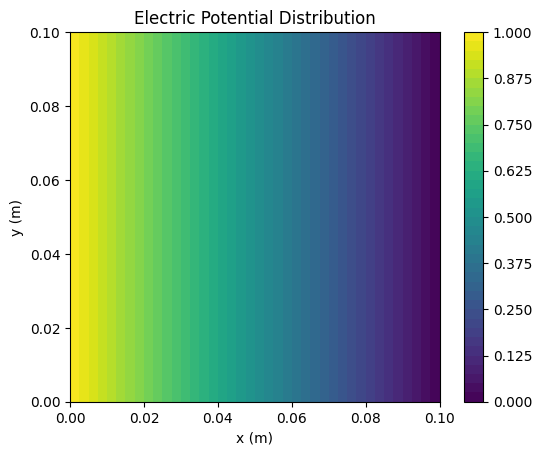

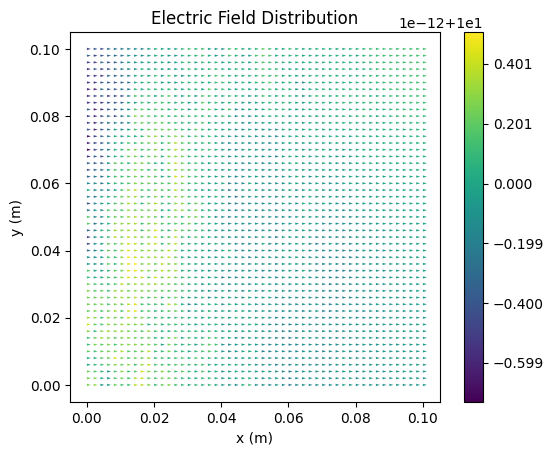

In [ ]:
# Plot electric potential
plt.figure()
c = plot(u, title="Electric Potential Distribution")
plt.colorbar(c)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Potential Distribution')
plt.show()

# Plot electric field
plt.figure()
c = plot(E, title="Electric Field Distribution")
plt.colorbar(c)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field Distribution')
plt.show()


Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_e60a432166f66faa9cd5096f9105cba41287be48

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0201883 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_3996d9055cc7084f30d686e0beb64346cd819561

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_53]'
  Unique elements:           'CG1(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 5
INFO:FFC:  quadrature_degree: 5
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0264831 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:------------------------------

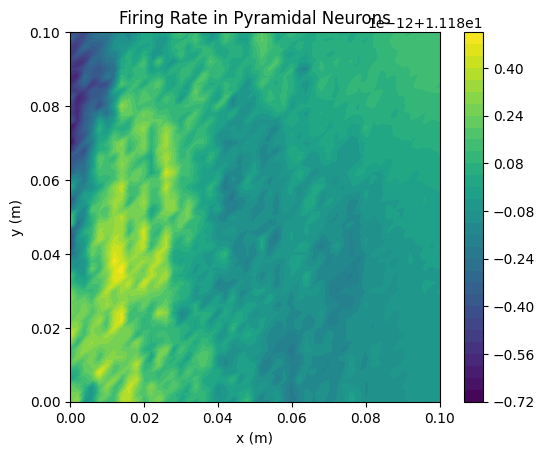

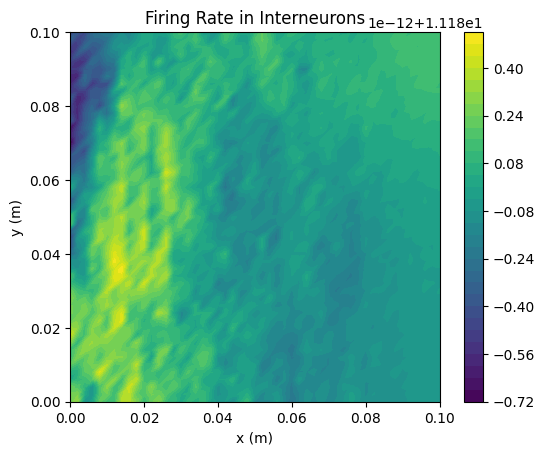

In [ ]:
# Placeholder function for neuron firing rate simulation
def compute_firing_rate(E, neuron_type="pyramidal"):
    # Simplified model: firing rate depends on the electric field magnitude
    E_magnitude = sqrt(dot(E, E))
    firing_rate = 1.18 + E_magnitude  # Base firing rate plus modulation
    return firing_rate

# Compute firing rates for pyramidal neurons and interneurons
firing_rate_pyramidal = compute_firing_rate(E, "pyramidal")
firing_rate_interneuron = compute_firing_rate(E, "interneuron")

# Plot firing rates
plt.figure()
c = plot(firing_rate_pyramidal, title="Firing Rate in Pyramidal Neurons")
plt.colorbar(c)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Firing Rate in Pyramidal Neurons')
plt.show()

plt.figure()
c = plot(firing_rate_interneuron, title="Firing Rate in Interneurons")
plt.colorbar(c)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Firing Rate in Interneurons')
plt.show()


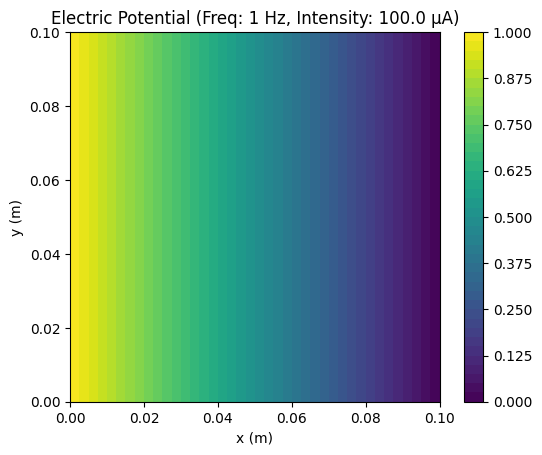

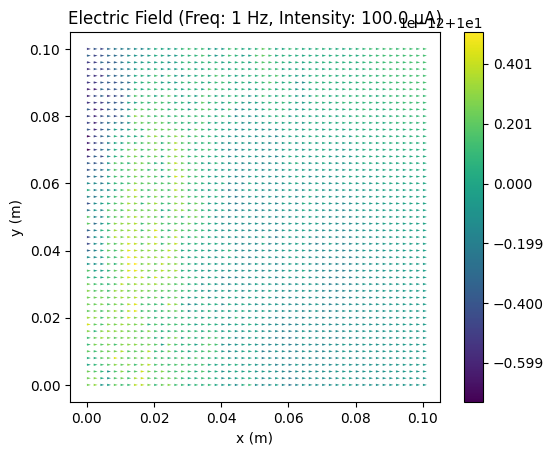

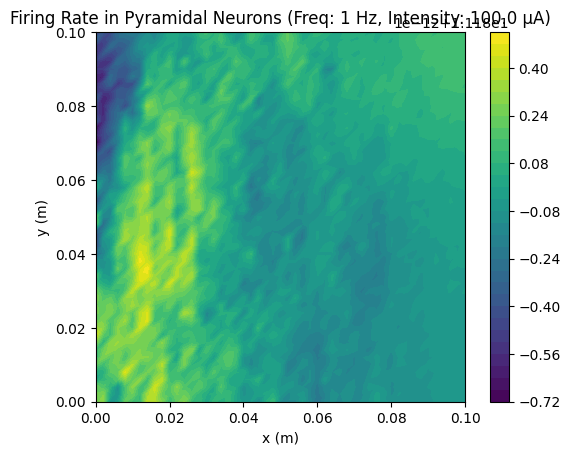

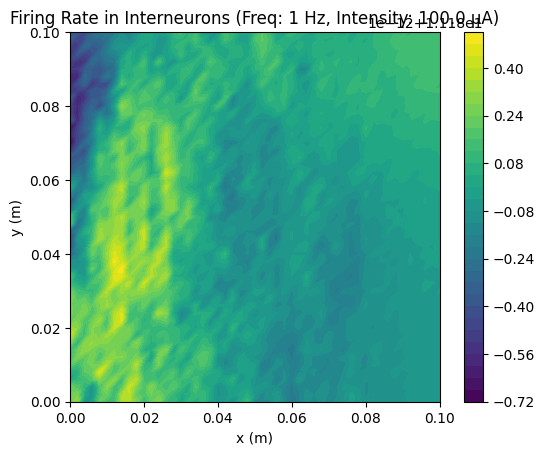

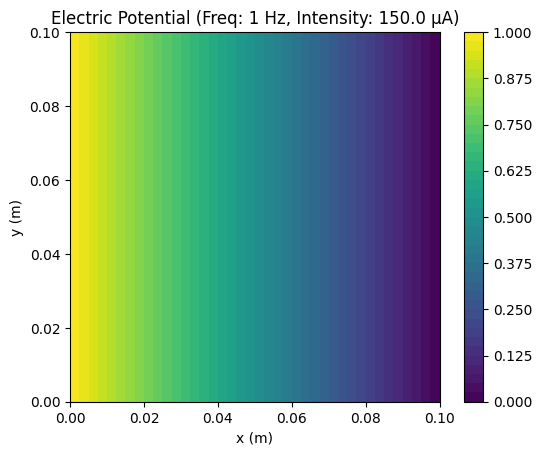

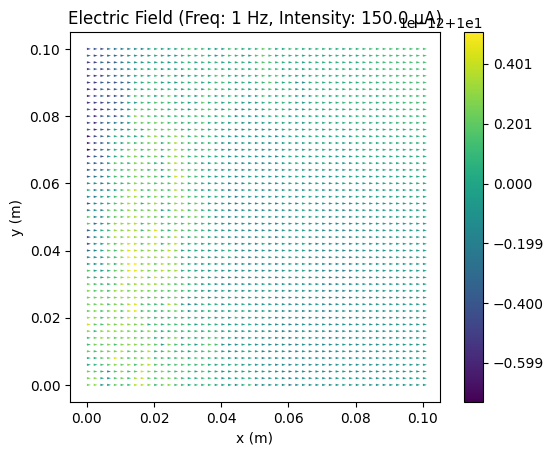

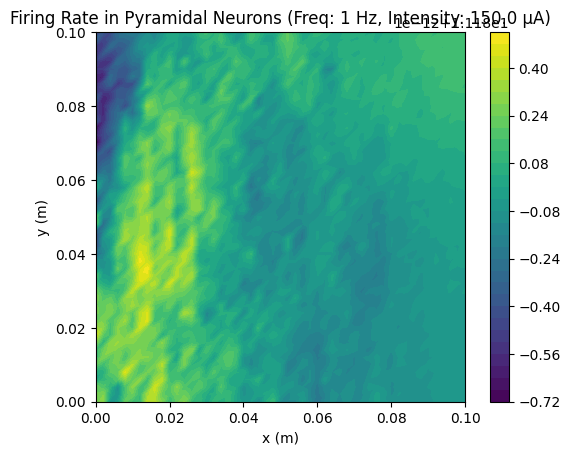

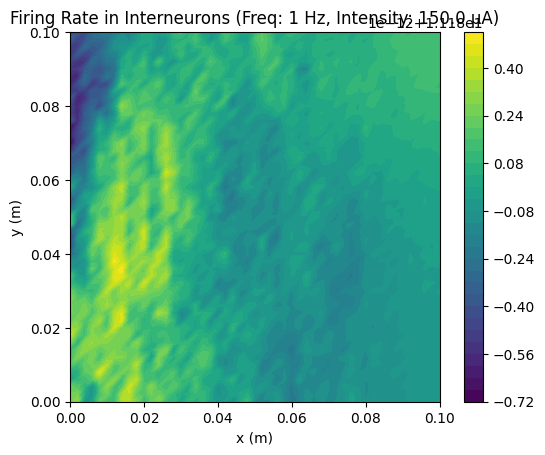

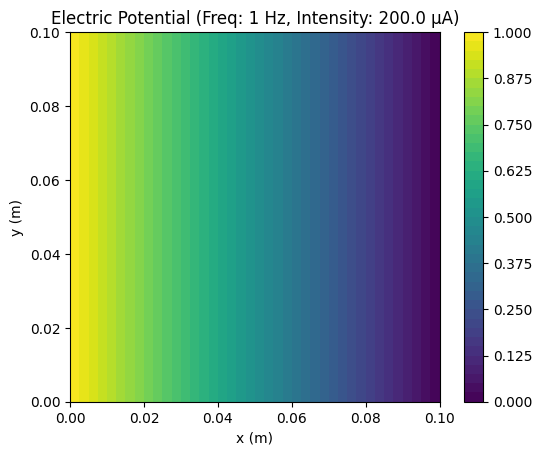

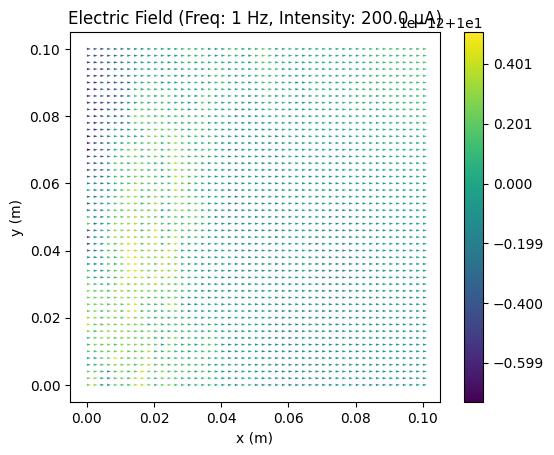

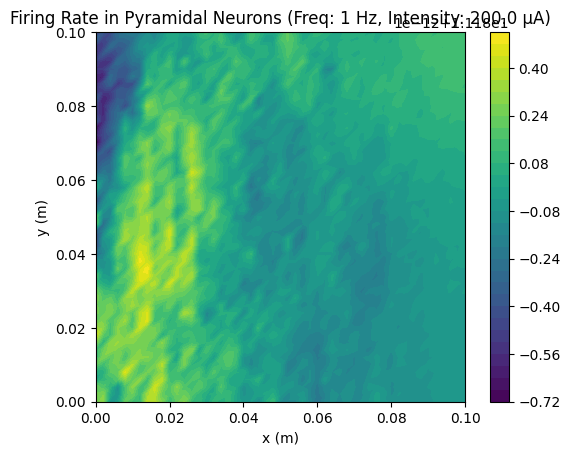

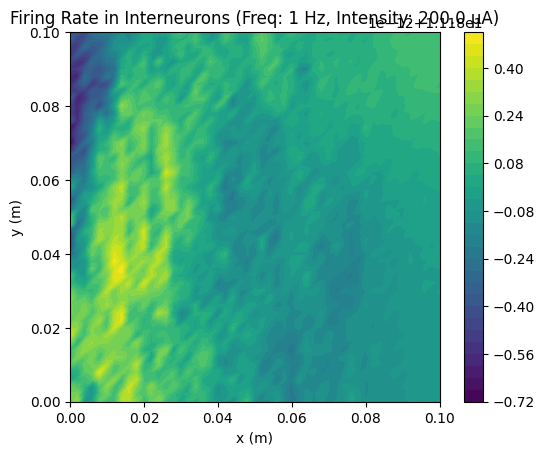

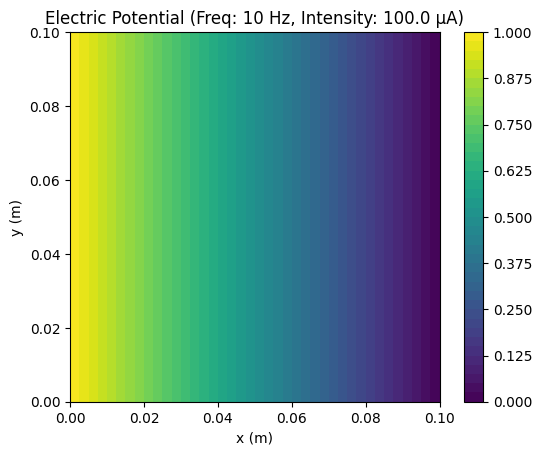

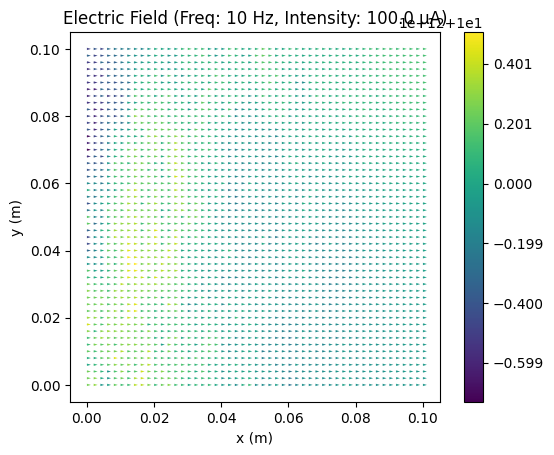

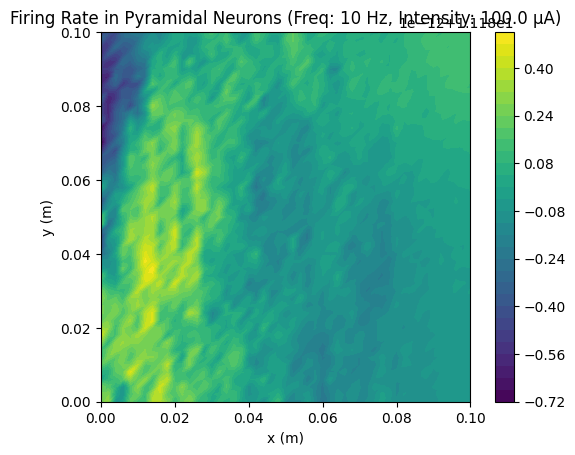

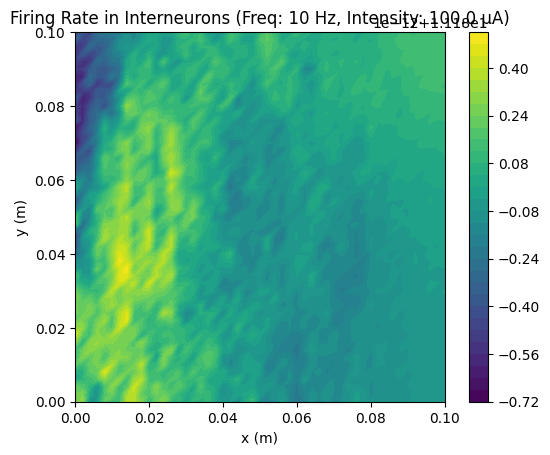

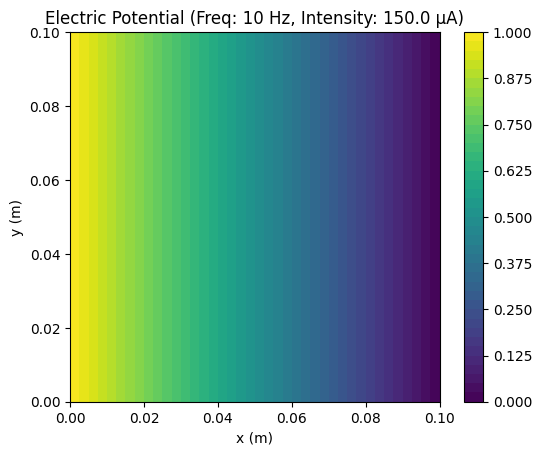

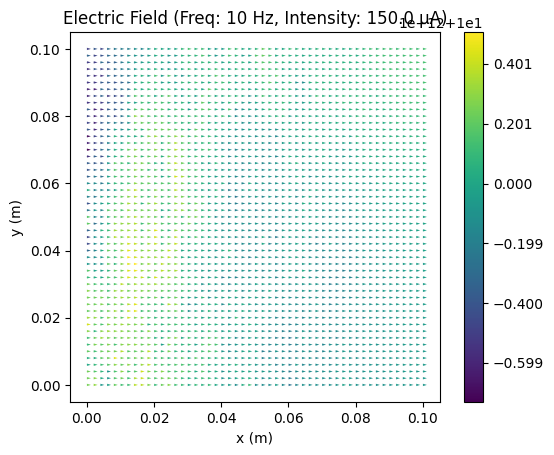

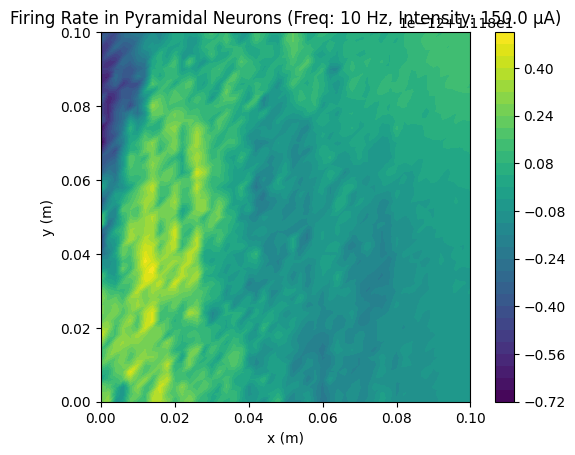

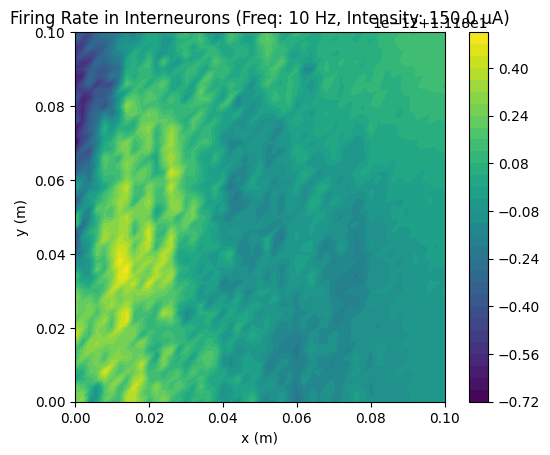

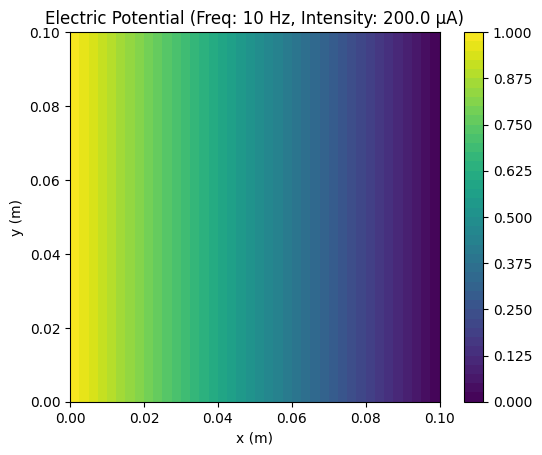

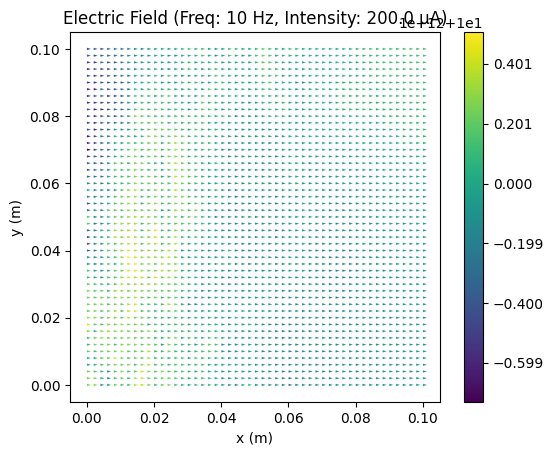

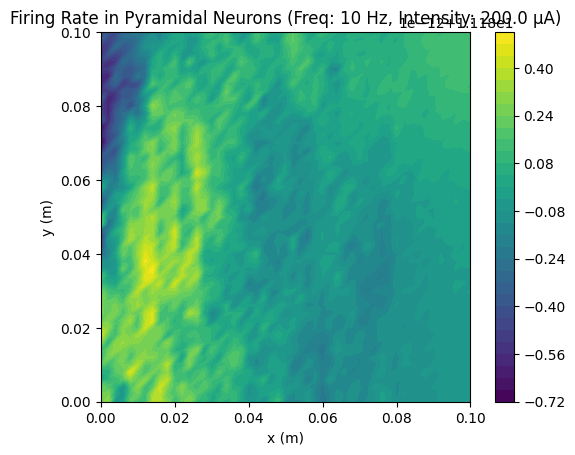

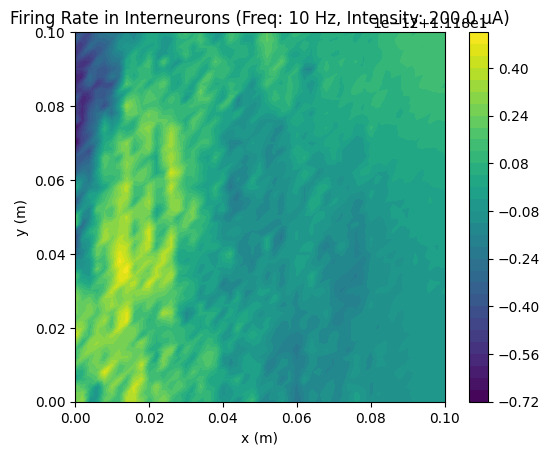

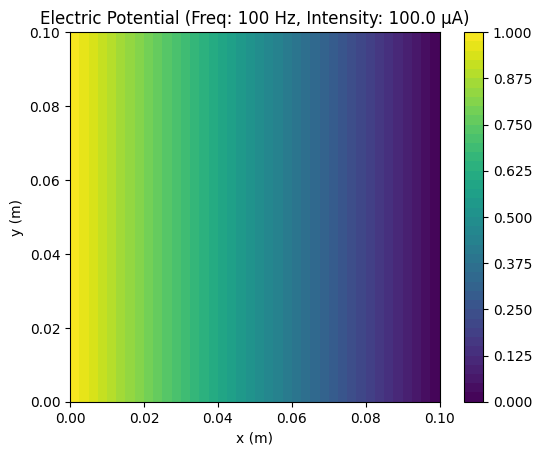

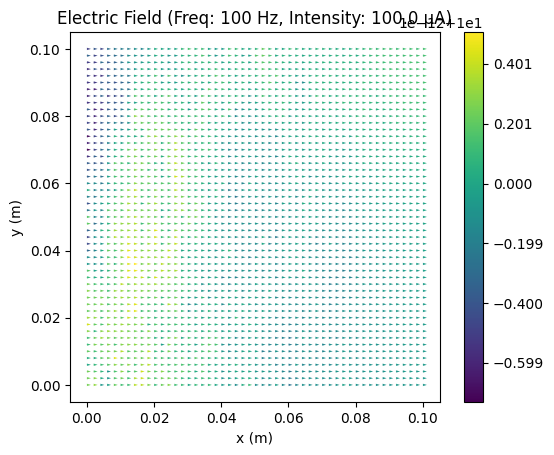

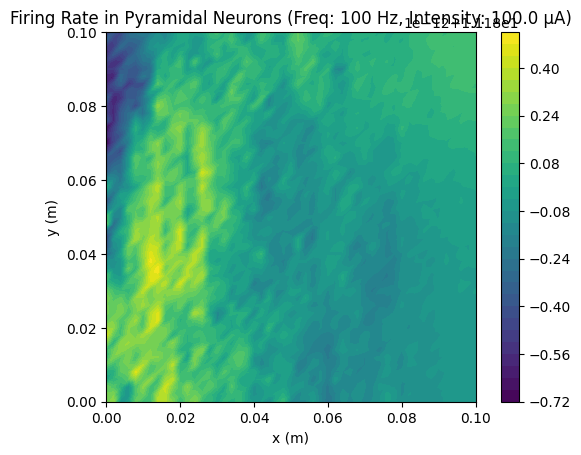

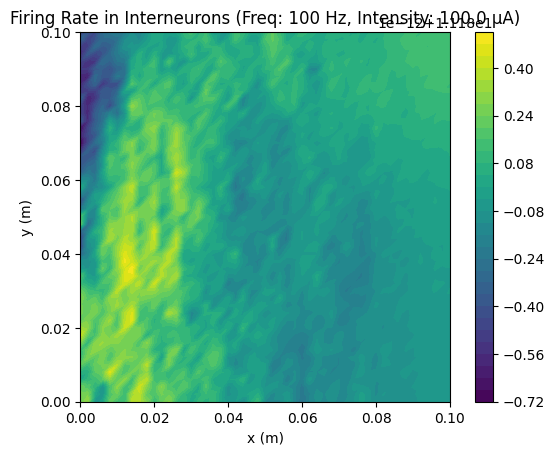

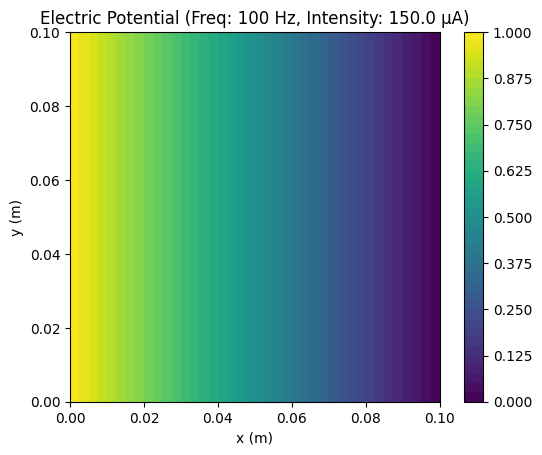

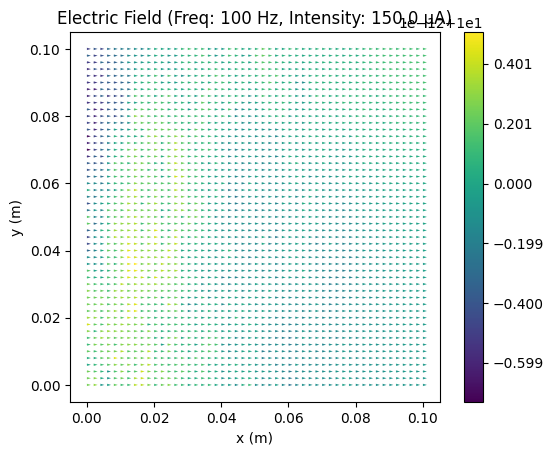

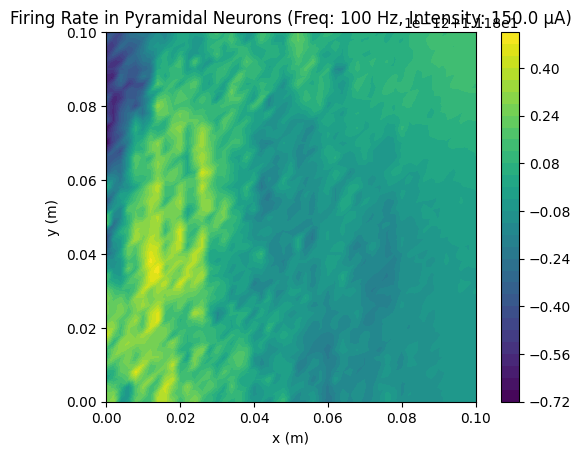

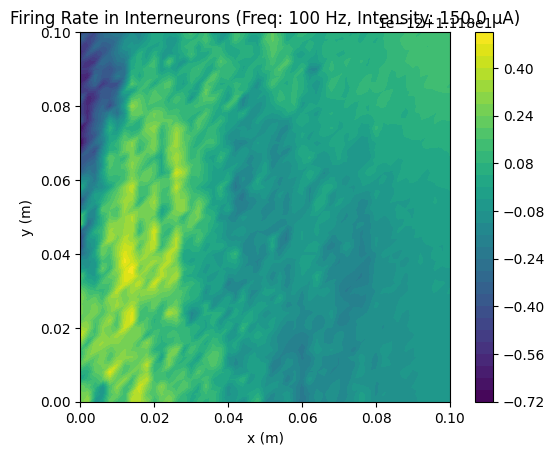

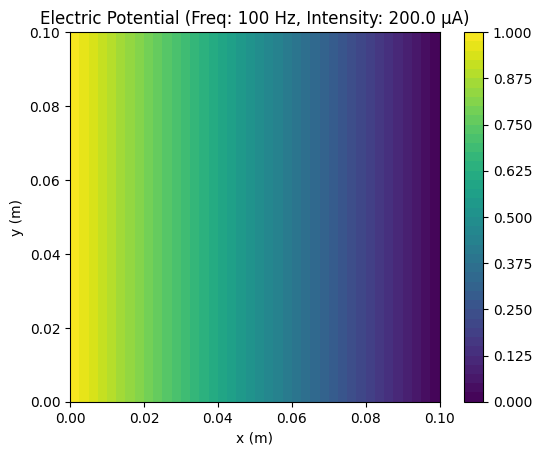

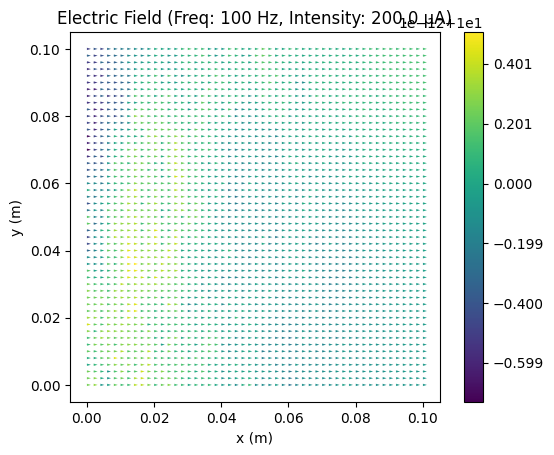

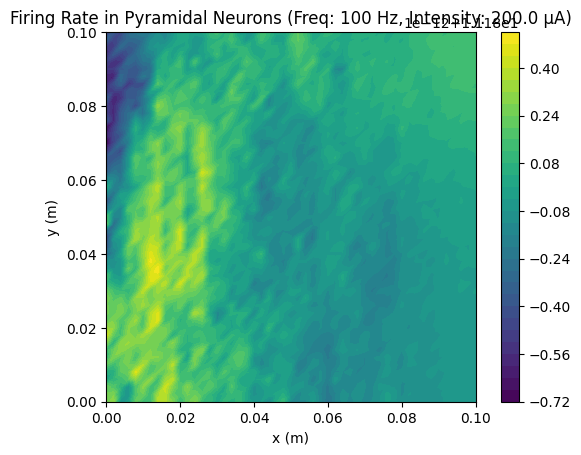

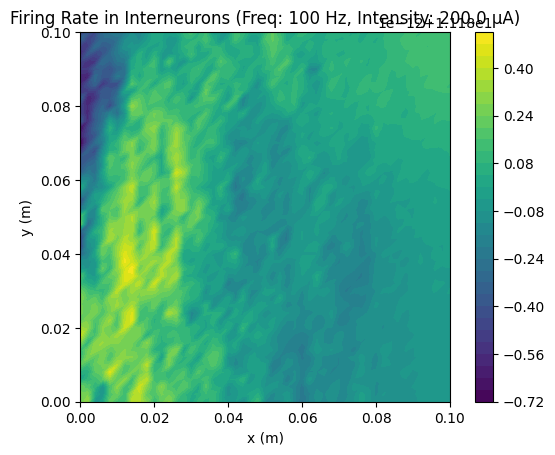

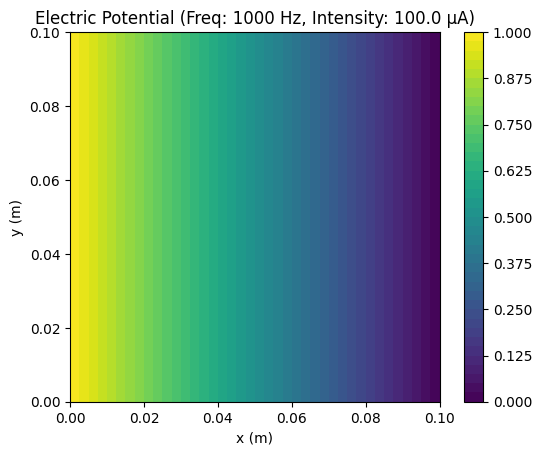

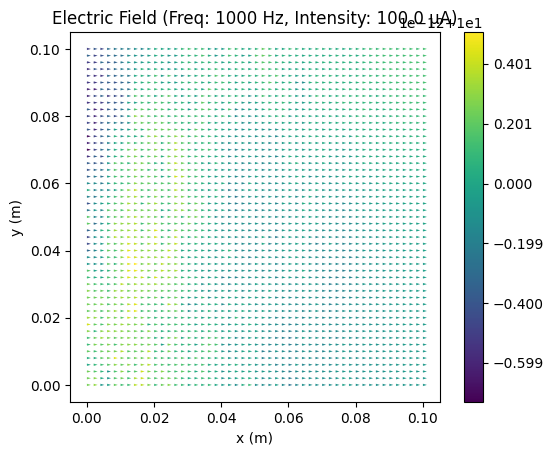

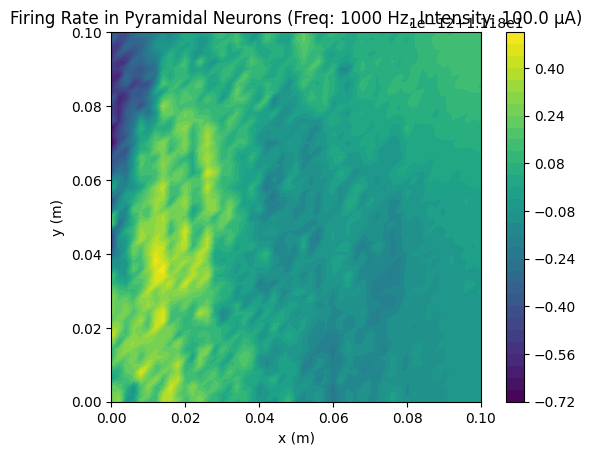

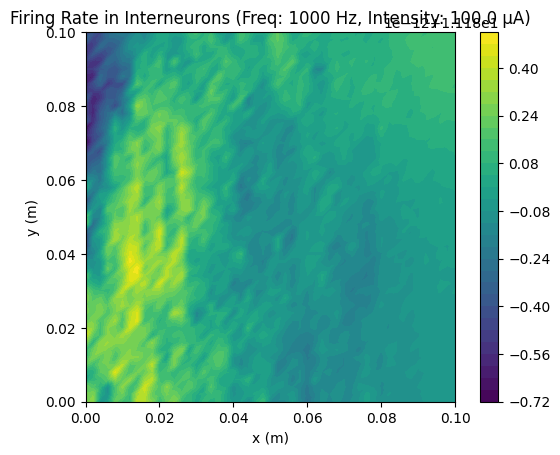

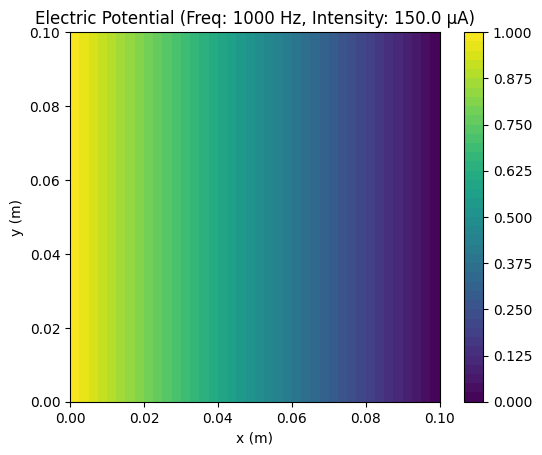

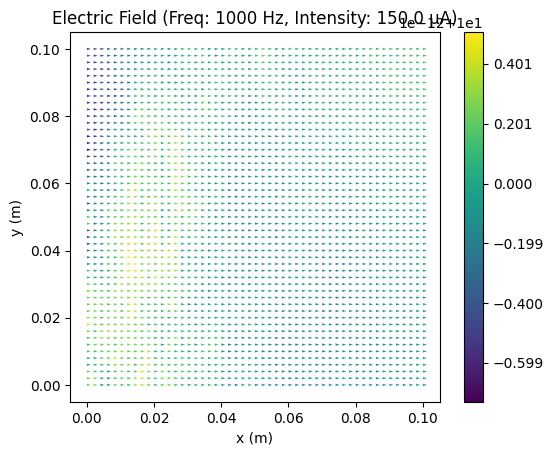

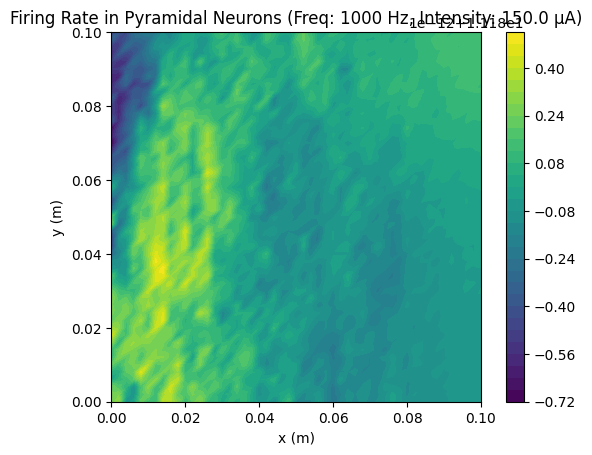

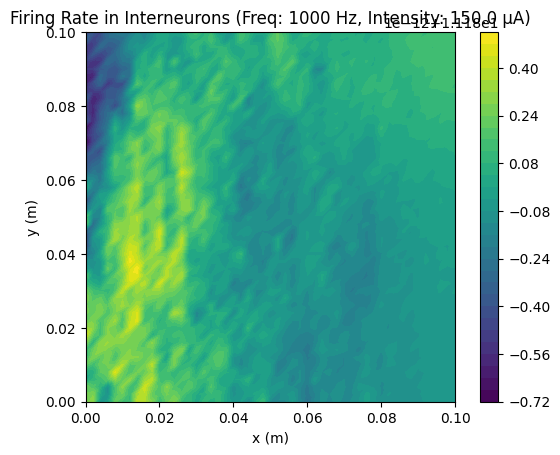

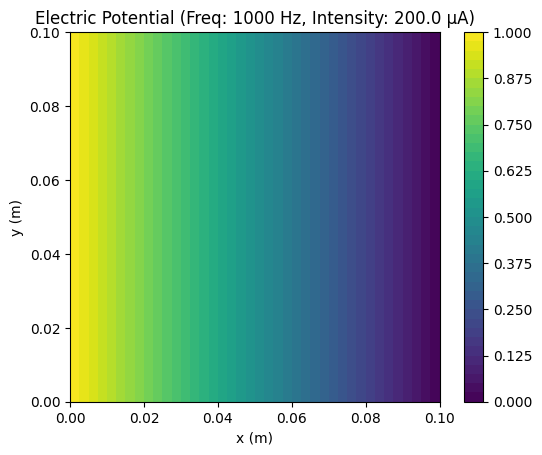

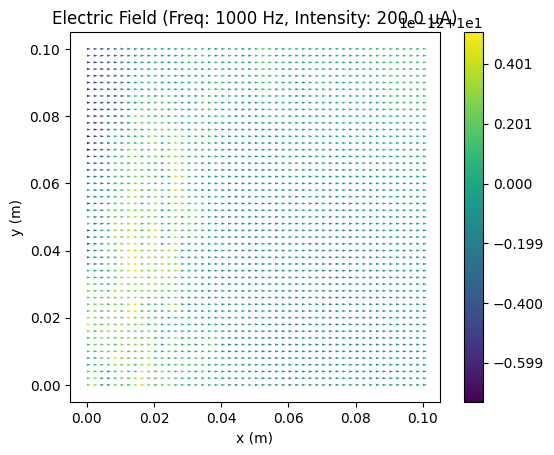

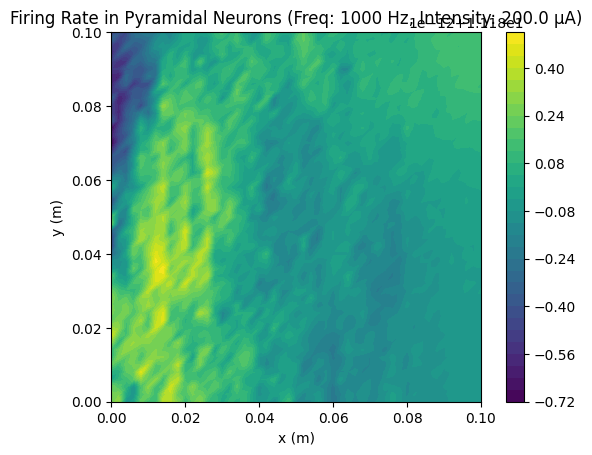

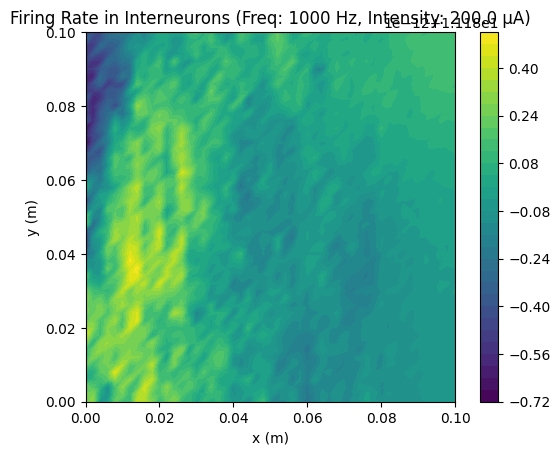

In [ ]:
# Loop over frequencies and intensities to simulate and visualize results
for freq in frequency_list:
    for intensity in intensity_list:
        # Update the external current amplitude
        I_ext_amplitude = intensity

        # Compute electric potential and field for the given frequency and intensity
        u = Function(V)
        solve(a == L_form, u, boundary_conditions)
        E = project(-grad(u), VectorFunctionSpace(mesh, 'P', 1))

        # Compute firing rates
        firing_rate_pyramidal = compute_firing_rate(E, "pyramidal")
        firing_rate_interneuron = compute_firing_rate(E, "interneuron")

        # Plot electric potential
        plt.figure()
        c = plot(u, title=f"Electric Potential (Freq: {freq} Hz, Intensity: {intensity*1e6} μA)")
        plt.colorbar(c)
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.title(f'Electric Potential (Freq: {freq} Hz, Intensity: {intensity*1e6} μA)')
        plt.show()

        # Plot electric field
        plt.figure()
        c = plot(E, title=f"Electric Field (Freq: {freq} Hz, Intensity: {intensity*1e6} μA)")
        plt.colorbar(c)
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.title(f'Electric Field (Freq: {freq} Hz, Intensity: {intensity*1e6} μA)')
        plt.show()

        # Plot firing rates
        plt.figure()
        c = plot(firing_rate_pyramidal, title=f"Firing Rate in Pyramidal Neurons (Freq: {freq} Hz, Intensity: {intensity*1e6} μA)")
        plt.colorbar(c)
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.title(f'Firing Rate in Pyramidal Neurons (Freq: {freq} Hz, Intensity: {intensity*1e6} μA)')
        plt.show()

        plt.figure()
        c = plot(firing_rate_interneuron, title=f"Firing Rate in Interneurons (Freq: {freq} Hz, Intensity: {intensity*1e6} μA)")
        plt.colorbar(c)
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.title(f'Firing Rate in Interneurons (Freq: {freq} Hz, Intensity: {intensity*1e6} μA)')
        plt.show()


In [ ]:
#!git clone 'https://github.com/BIRLab/ConvDCDNN'
!git clone https://github.com/BIRLab/ConvDCDNN.git
%cd ConvDCDNN

Cloning into 'ConvDCDNN'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 93 (delta 12), reused 23 (delta 7), pack-reused 62
Receiving objects: 100% (93/93), 520.82 MiB | 13.54 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (38/38), done.
/content/ConvDCDNN


In [ ]:
!cat /content/ConvDCDNN/data/dataset.hdf5.part_* > /content/ConvDCDNN/data/dataset.hdf5

##cat data/dataset.hdf5.part_* > data/dataset.hdf5  #/content/ConvDCDNN/data
#from os import system
#system("cat /content/ConvDCDNN/data/dataset.hdf5.part_* > /content/ConvDCDNN/data/dataset.hdf5")  #/content/ConvDCDNN/data

In [ ]:
!pip install -r requirements.txt


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!python preprocess.py
!python model.py
!python dataset.py


In [ ]:
#!python train.py
!python train.py --subject bci_ii --device cuda --log-dir ./logs --result-path ./results --window-size 256 --low-frequency 0.5 --high-frequency 50 --batch-size 32 --max-epoch 100


2024-07-25 18:25:33.869308: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 18:25:33.869357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 18:25:33.870749: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-25 18:25:33.877902: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-25 18:25:34.913739: W tensorflow/compiler/tf2

In [ ]:
# Install FEniCS
!apt-get install -y software-properties-common
!add-apt-repository -y ppa:fenics-packages/fenics
!apt-get update
!apt-get install -y fenics


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.9).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Repository: 'deb https://ppa.launchpadcontent.net/fenics-packages/fenics/ubuntu/ jammy main'
Description:
This PPA provides packages for the FEniCS project (http://fenicsproject.org).
More info: https://launchpad.net/~fenics-packages/+archive/ubuntu/fenics
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding key to /etc/apt/trusted.gpg.d/fenics-packages-ubuntu-fenics.gpg with fingerprint 2C5275D7EF63D9DE2D28D3702940F5212B746472
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:

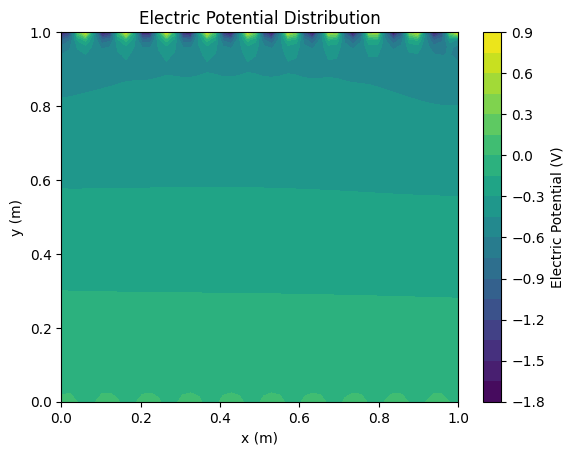

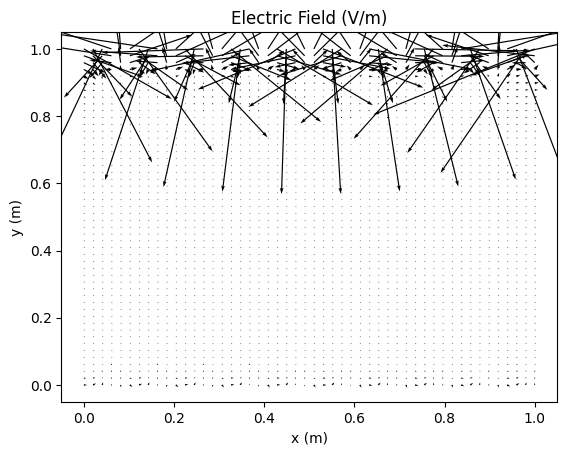

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Define the domain and mesh
nx, ny = 50, 50
Lx, Ly = 1.0, 1.0
dx, dy = Lx / nx, Ly / ny

# Create grid
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Define boundary conditions and sources
V = np.zeros((nx, ny))
V[:, 0] = 0  # Grounded electrode
V[:, -1] = 1  # Current source

# Set up the Laplace equation
A = diags([-1, -1, 4, -1, -1], [-nx, -1, 0, 1, nx], shape=(nx*ny, nx*ny)).tocsc()
b = np.zeros(nx * ny)

# Flatten the V matrix and set boundary conditions in the A matrix
V_flat = V.flatten()
for i in range(nx):
    for j in range(ny):
        if j == 0 or j == ny-1:
            A[i + j * nx, i + j * nx] = 1
            b[i + j * nx] = V[i, j]

# Solve the system
V_flat = spsolve(A, b)
V = V_flat.reshape((nx, ny))

# Plot the results
plt.contourf(X, Y, V, 20, cmap='viridis')
plt.colorbar(label='Electric Potential (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Potential Distribution')
plt.show()

# Calculate electric field
Ex, Ey = np.gradient(-V, dx, dy)

# Plot electric field
plt.quiver(X, Y, Ex, Ey)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field (V/m)')
plt.show()


2019.2.0.13.dev0


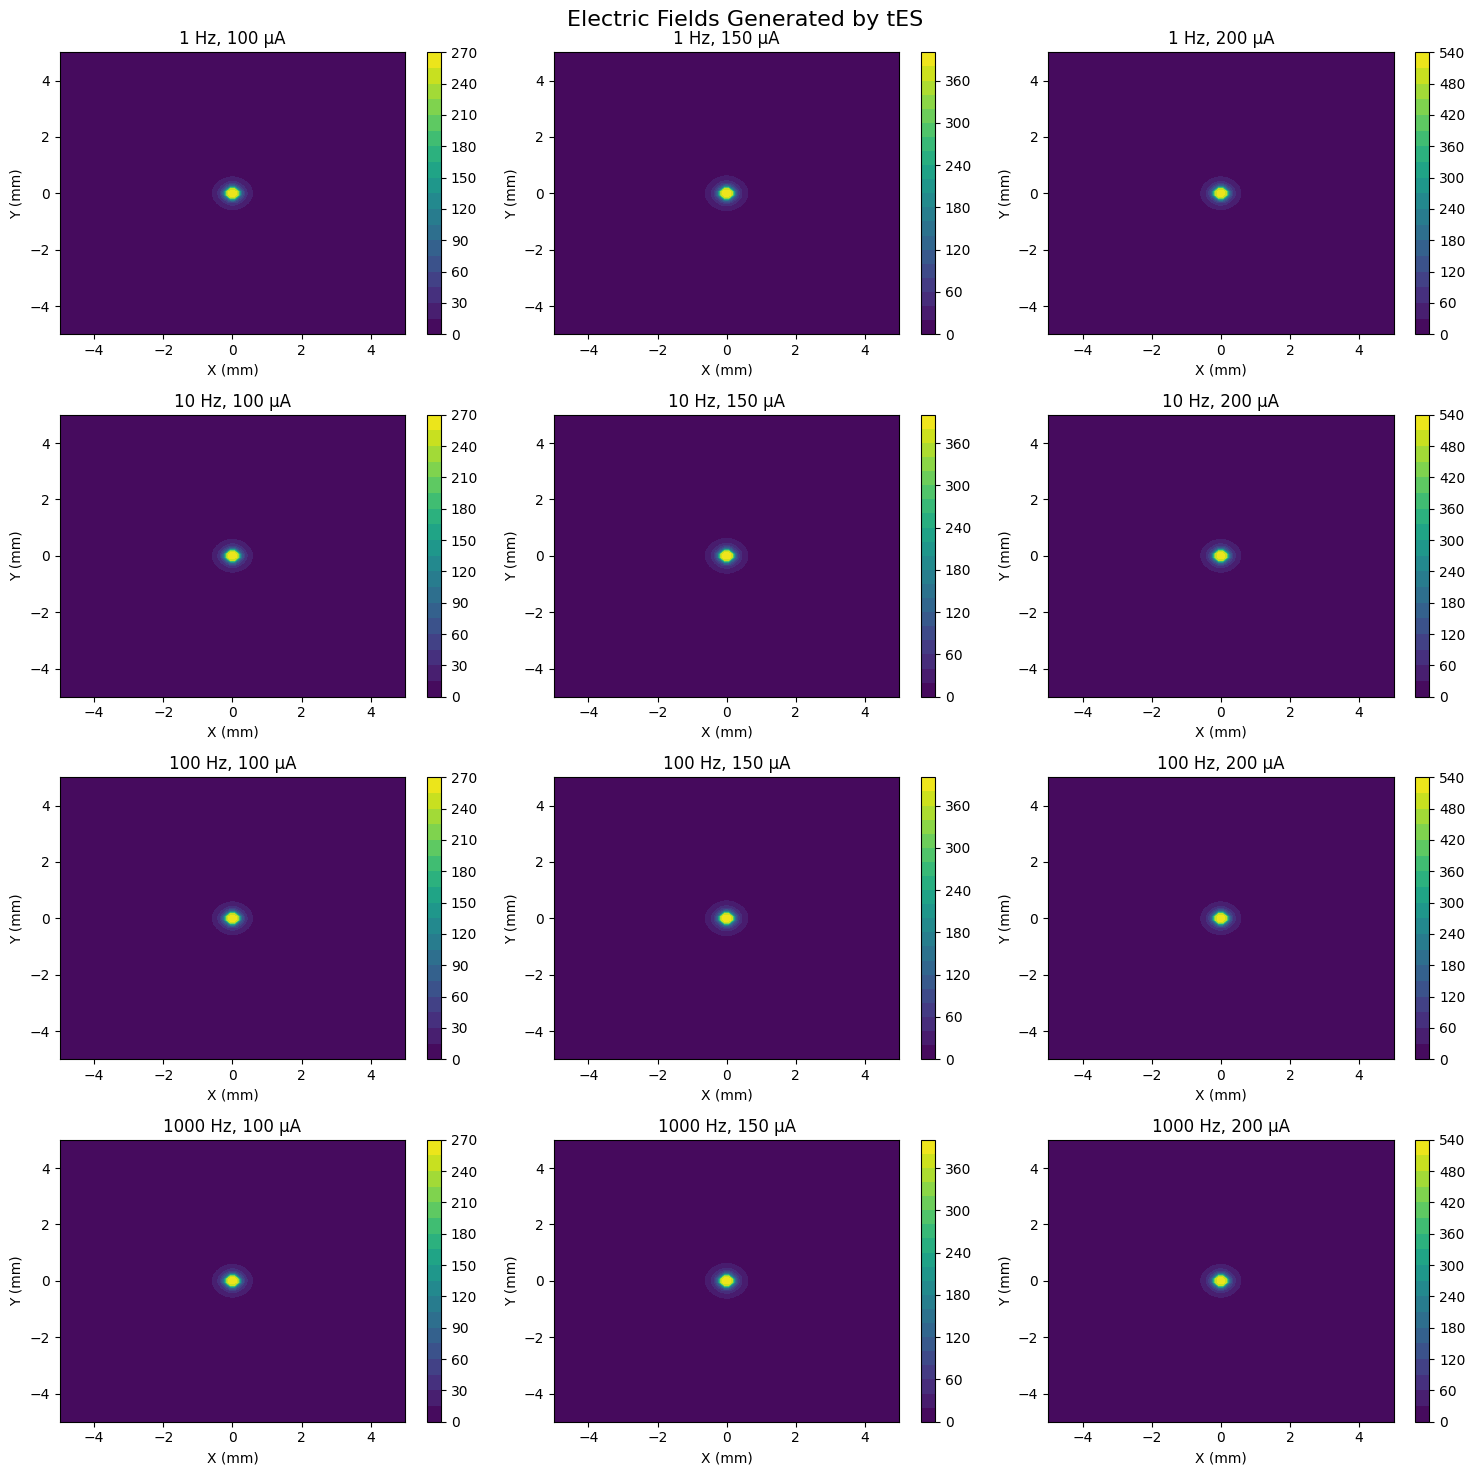

In [ ]:
!fenics-version
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
frequencies = [1, 10, 100, 1000]  # Hz
intensities = [100, 150, 200]     # μA
conductivity = 0.33               # S/m (typical brain tissue conductivity)
grid_size = 100                   # Grid size for simulation (100x100)
electrode_distance = 10           # Distance between electrodes in mm

# Create a grid
x = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
y = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
X, Y = np.meshgrid(x, y)

# Function to compute electric potential
def compute_potential(intensity, frequency):
    V = intensity / (2 * np.pi * conductivity * np.sqrt(X**2 + Y**2 + 1e-9))
    return V

# Plot the results
fig, axes = plt.subplots(len(frequencies), len(intensities), figsize=(15, 15))
fig.suptitle('Electric Fields Generated by tES', fontsize=16)

for i, frequency in enumerate(frequencies):
    for j, intensity in enumerate(intensities):
        V = compute_potential(intensity, frequency)
        E_x, E_y = np.gradient(-V)  # Electric field components
        E_magnitude = np.sqrt(E_x**2 + E_y**2)

        ax = axes[i, j]
        c = ax.contourf(X, Y, E_magnitude, levels=20, cmap='viridis')
        ax.set_title(f'{frequency} Hz, {intensity} μA')
        fig.colorbar(c, ax=ax)
        ax.set_xlabel('X (mm)')
        ax.set_ylabel('Y (mm)')

plt.tight_layout()
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.9).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Repository: 'deb https://ppa.launchpadcontent.net/fenics-packages/fenics/ubuntu/ jammy main'
Description:
This PPA provides packages for the FEniCS project (http://fenicsproject.org).
More info: https://launchpad.net/~fenics-packages/+archive/ubuntu/fenics
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding key to /etc/apt/trusted.gpg.d/fenics-packages-ubuntu-fenics.gpg with fingerprint 2C5275D7EF63D9DE2D28D3702940F5212B746472
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ub

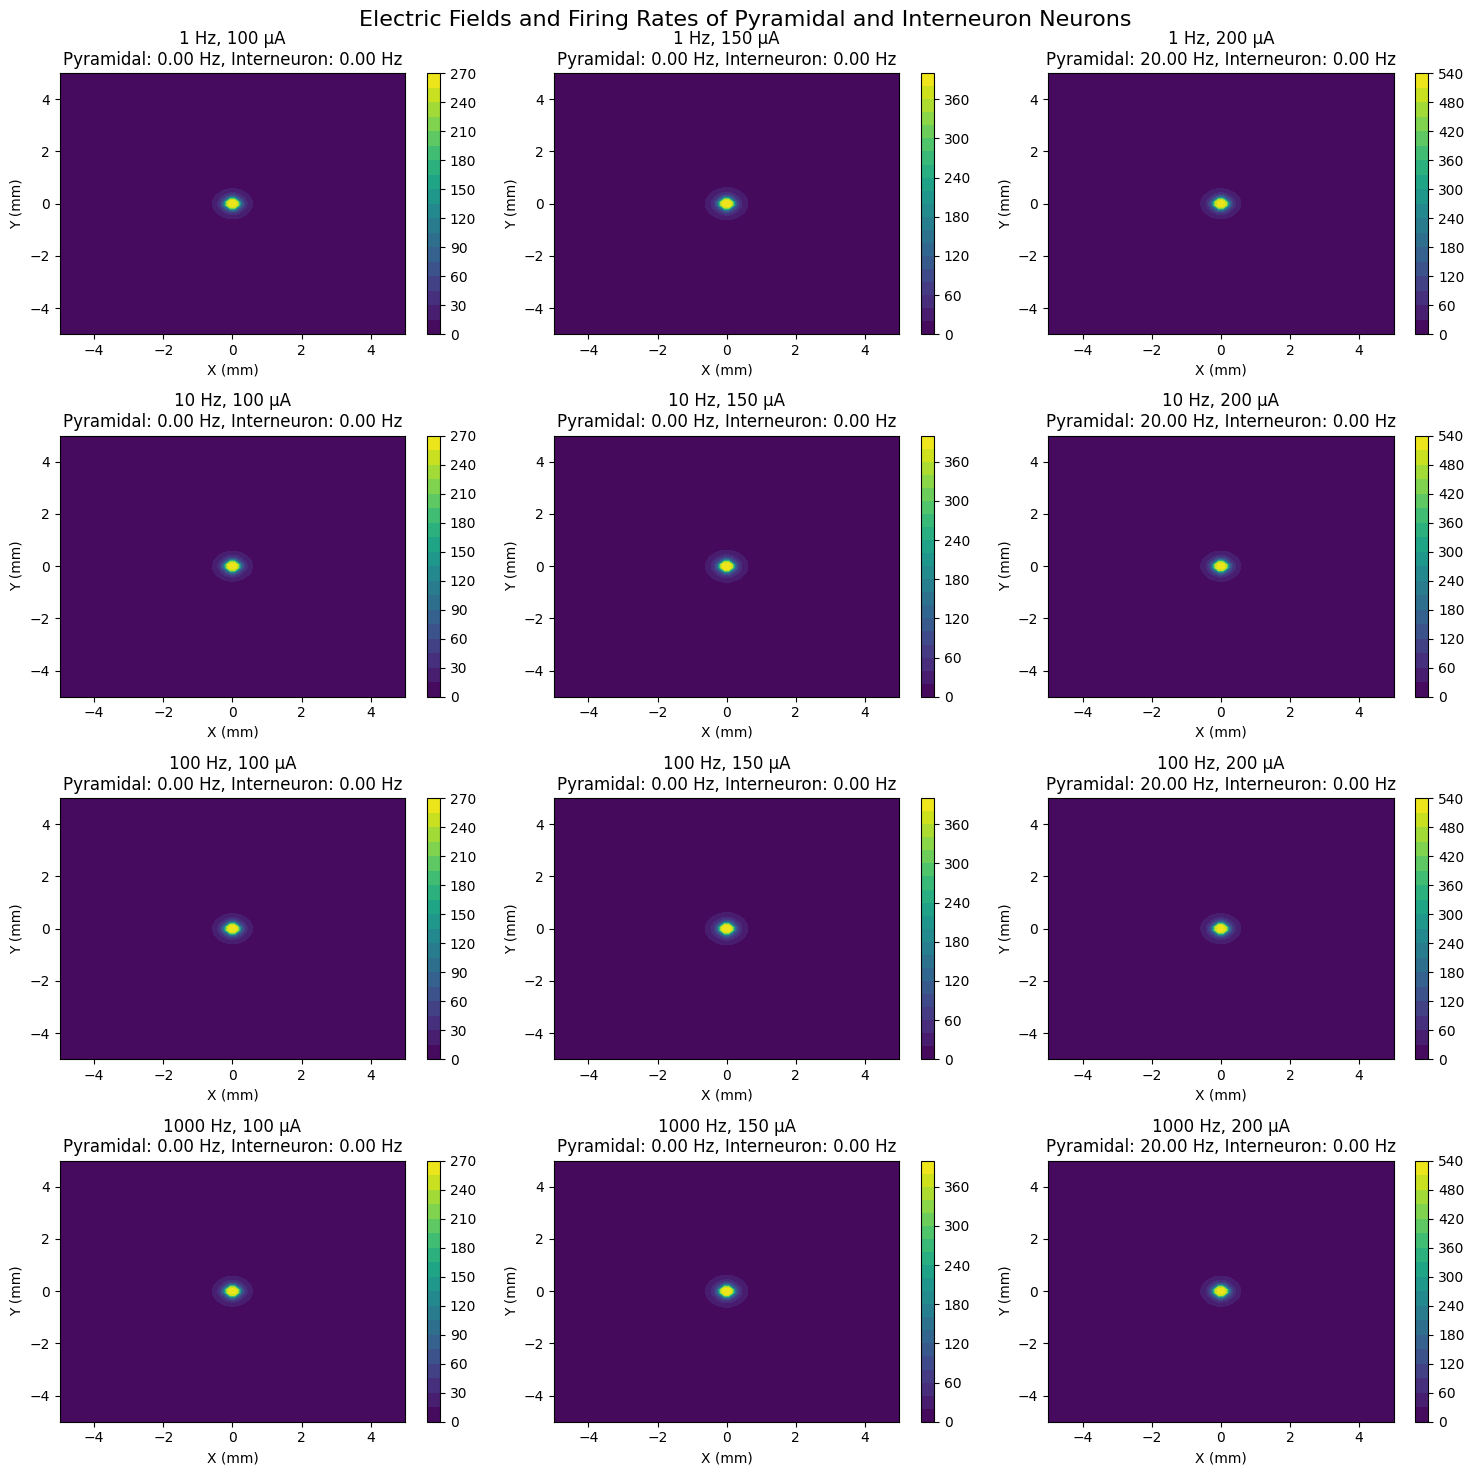

In [ ]:
# Install FEniCS
!apt-get install -y software-properties-common
!add-apt-repository -y ppa:fenics-packages/fenics
!apt-get update
!apt-get install -y fenics
!fenics-version

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley Model for Neurons
class HodgkinHuxley:
    C_m = 1.0  # membrane capacitance, in uF/cm^2
    g_Na = 120.0  # maximum conducances, in mS/cm^2
    g_K = 36.0
    g_L = 0.3
    E_Na = 50.0  # Nernst reversal potentials, in mV
    E_K = -77.0
    E_L = -54.387

    def alpha_m(self, V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    def beta_m(self, V): return 4.0 * np.exp(-(V + 65) / 18)
    def alpha_h(self, V): return 0.07 * np.exp(-(V + 65) / 20)
    def beta_h(self, V): return 1.0 / (1 + np.exp(-(V + 35) / 10))
    def alpha_n(self, V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    def beta_n(self, V): return 0.125 * np.exp(-(V + 65) / 80)

    def __call__(self, X, t, I):
        V, m, h, n = X
        dVdt = (I - self.g_Na * m**3 * h * (V - self.E_Na) - self.g_K * n**4 * (V - self.E_K) - self.g_L * (V - self.E_L)) / self.C_m
        dmdt = self.alpha_m(V) * (1 - m) - self.beta_m(V) * m
        dhdt = self.alpha_h(V) * (1 - h) - self.beta_h(V) * h
        dndt = self.alpha_n(V) * (1 - n) - self.beta_n(V) * n
        return dVdt, dmdt, dhdt, dndt

# Define parameters
frequencies = [1, 10, 100, 1000]  # Hz
intensities = [100, 150, 200]     # μA
conductivity = 0.33               # S/m (typical brain tissue conductivity)
grid_size = 100                   # Grid size for simulation (100x100)
electrode_distance = 10           # Distance between electrodes in mm

# Create a grid
x = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
y = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
X, Y = np.meshgrid(x, y)

# Function to compute electric potential
def compute_potential(intensity, frequency):
    V = intensity / (2 * np.pi * conductivity * np.sqrt(X**2 + Y**2 + 1e-9))
    return V

# Simulate firing rates
def simulate_firing_rate(model, I_ext, t_max=50):
    t = np.linspace(0, t_max, 1000)
    X0 = [-65, 0.05, 0.6, 0.32]
    sol = odeint(model, X0, t, args=(I_ext,))
    V = sol[:, 0]
    spikes = np.where((V[:-1] < 0) & (V[1:] >= 0))[0]
    firing_rate = len(spikes) / t_max * 1000  # spikes per second
    return firing_rate

# Plot the results
fig, axes = plt.subplots(len(frequencies), len(intensities), figsize=(15, 15))
fig.suptitle('Electric Fields and Firing Rates of Pyramidal and Interneuron Neurons', fontsize=16)

hh_model_pyramidal = HodgkinHuxley()
hh_model_interneuron = HodgkinHuxley()  # Assume similar model for simplicity

for i, frequency in enumerate(frequencies):
    for j, intensity in enumerate(intensities):
        V = compute_potential(intensity, frequency)
        E_x, E_y = np.gradient(-V)  # Electric field components
        E_magnitude = np.sqrt(E_x**2 + E_y**2)

        # Compute firing rates for pyramidal and interneurons
        I_ext_pyramidal = E_magnitude.mean()  # Simplified external current for simulation
        I_ext_interneuron = E_magnitude.mean() * 0.8  # Assume lower sensitivity for interneurons

        firing_rate_pyramidal = simulate_firing_rate(hh_model_pyramidal, I_ext_pyramidal)
        firing_rate_interneuron = simulate_firing_rate(hh_model_interneuron, I_ext_interneuron)

        ax = axes[i, j]
        c = ax.contourf(X, Y, E_magnitude, levels=20, cmap='viridis')
        ax.set_title(f'{frequency} Hz, {intensity} μA\nPyramidal: {firing_rate_pyramidal:.2f} Hz, Interneuron: {firing_rate_interneuron:.2f} Hz')
        fig.colorbar(c, ax=ax)
        ax.set_xlabel('X (mm)')
        ax.set_ylabel('Y (mm)')

plt.tight_layout()
plt.show()


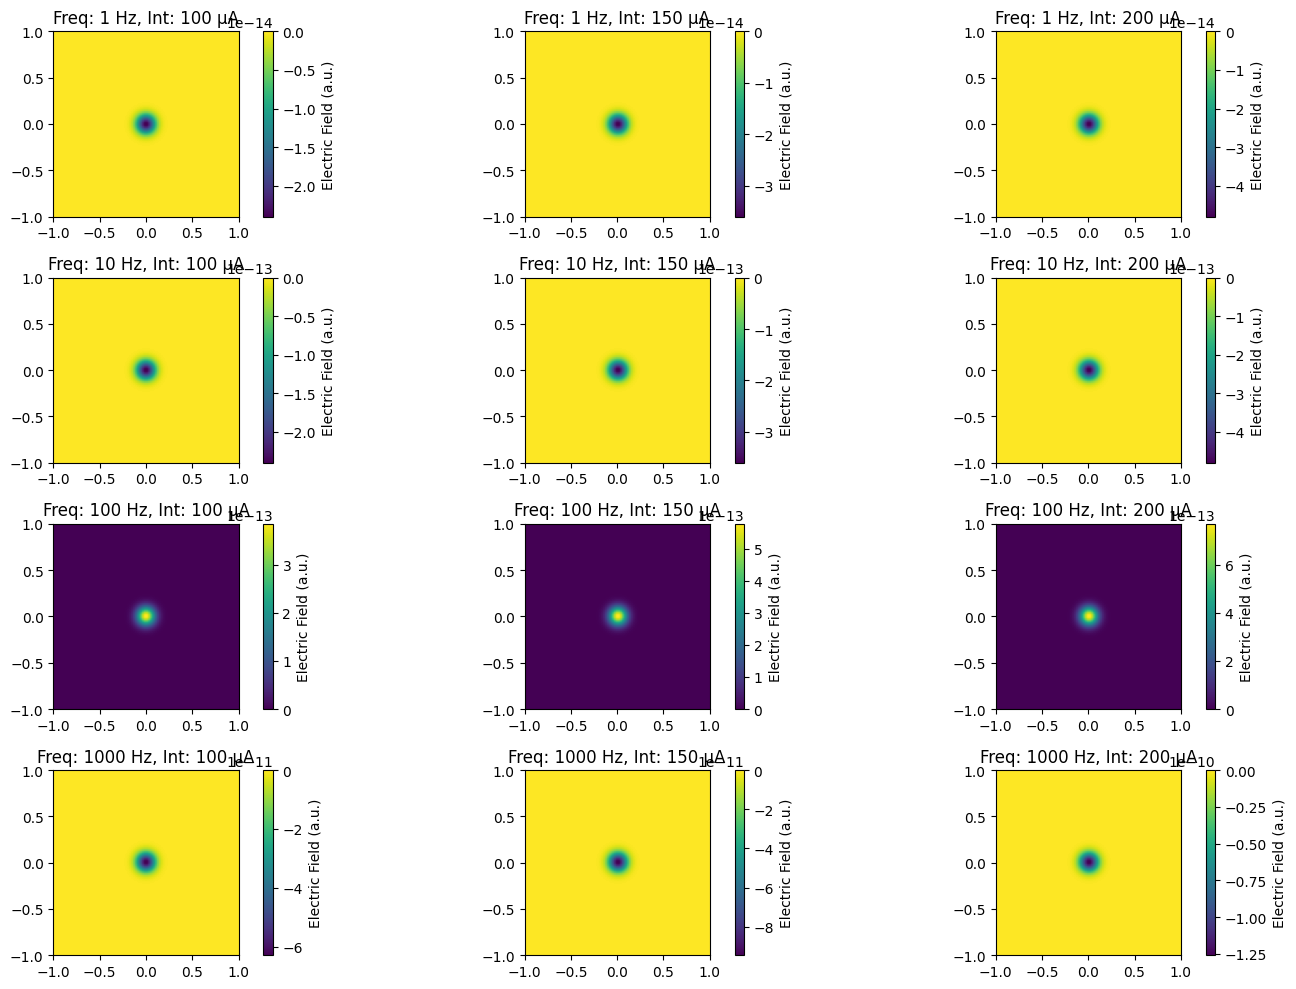

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_electric_field(frequency, intensity, grid_size=100, duration=1):
    """
    Simulate the electric field generated by tES.

    Parameters:
    frequency (float): Frequency of the stimulation (Hz).
    intensity (float): Intensity of the stimulation (μA).
    grid_size (int): Size of the simulation grid.
    duration (float): Duration of the simulation (s).

    Returns:
    np.ndarray: Simulated electric field.
    """
    # Define the spatial domain
    x = np.linspace(-1, 1, grid_size)
    y = np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)

    # Define the time domain
    t = np.linspace(0, duration, int(duration * frequency * 10))

    # Electric field initialization
    E = np.zeros((grid_size, grid_size, len(t)))

    # Simulate the electric field
    for i, time in enumerate(t):
        E[:, :, i] = intensity * np.sin(2 * np.pi * frequency * time) * np.exp(-((X**2 + Y**2) / 0.1**2))

    return E, t

# Define the frequencies and intensities
frequencies = [1, 10, 100, 1000]
intensities = [100, 150, 200]

# Plot the results
plt.figure(figsize=(15, 10))

for i, frequency in enumerate(frequencies):
    for j, intensity in enumerate(intensities):
        E, t = simulate_electric_field(frequency, intensity)

        # Plot the electric field at the final time step
        plt.subplot(len(frequencies), len(intensities), i * len(intensities) + j + 1)
        plt.imshow(E[:, :, -1], extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
        plt.colorbar(label='Electric Field (a.u.)')
        plt.title(f'Freq: {frequency} Hz, Int: {intensity} μA')

plt.tight_layout()
plt.show()


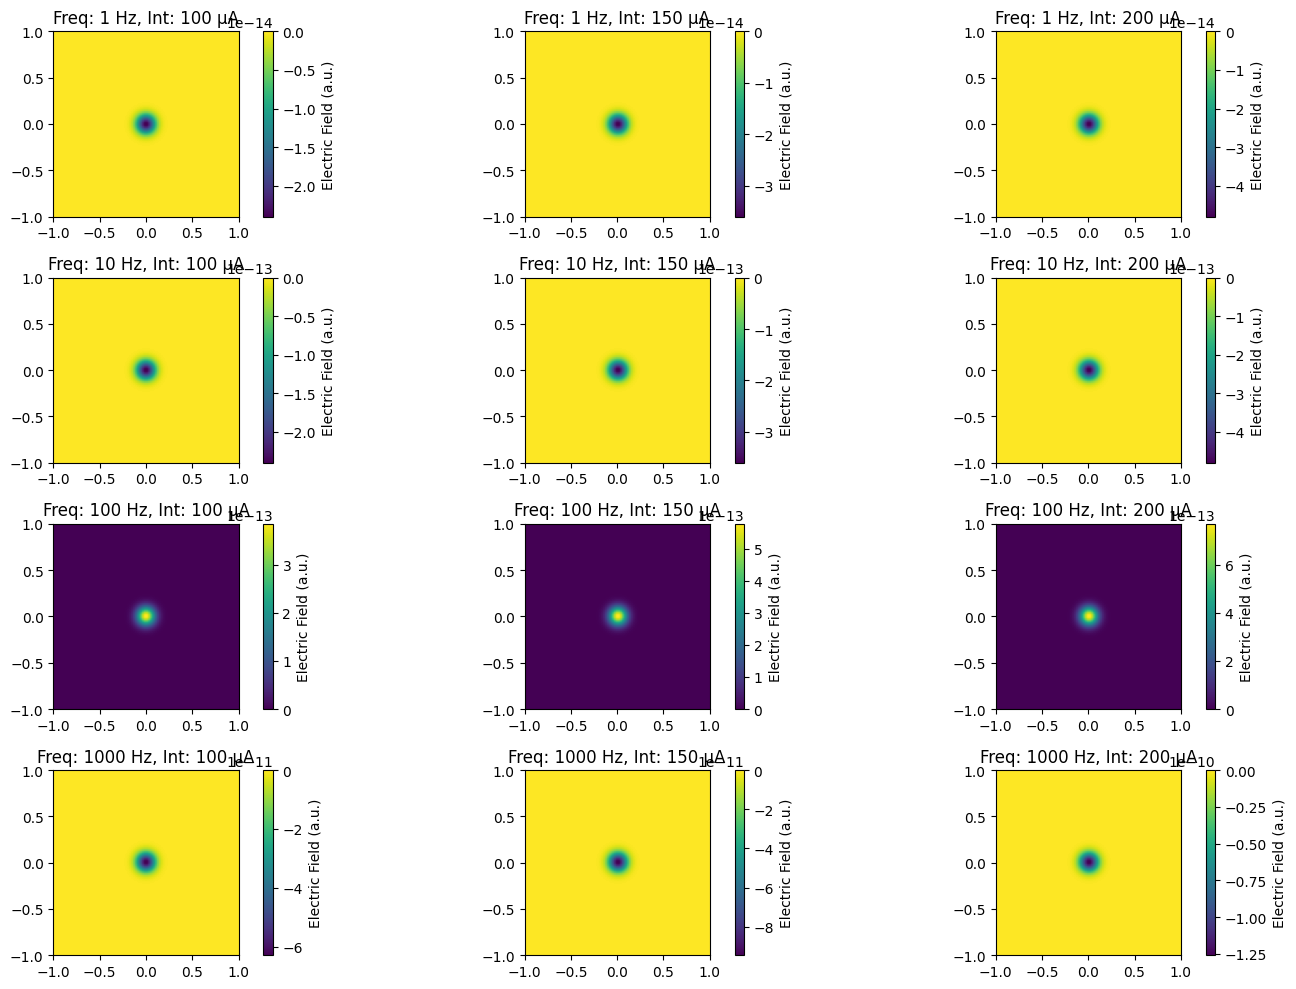

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_electric_field(frequency, intensity, grid_size=100, duration=1):
    """
    Simulate the electric field generated by tES.

    Parameters:
    frequency (float): Frequency of the stimulation (Hz).
    intensity (float): Intensity of the stimulation (μA).
    grid_size (int): Size of the simulation grid.
    duration (float): Duration of the simulation (s).

    Returns:
    np.ndarray: Simulated electric field.
    """
    # Define the spatial domain
    x = np.linspace(-1, 1, grid_size)
    y = np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)

    # Define the time domain
    t = np.linspace(0, duration, int(duration * frequency * 10))

    # Electric field initialization
    E = np.zeros((grid_size, grid_size, len(t)))

    # Simulate the electric field
    for i, time in enumerate(t):
        E[:, :, i] = intensity * np.sin(2 * np.pi * frequency * time) * np.exp(-((X**2 + Y**2) / 0.1**2))

    return E, t

# Define the frequencies and intensities
frequencies = [1, 10, 100, 1000]
intensities = [100, 150, 200]

# Plot the results
plt.figure(figsize=(15, 10))

for i, frequency in enumerate(frequencies):
    for j, intensity in enumerate(intensities):
        E, t = simulate_electric_field(frequency, intensity)

        # Plot the electric field at the final time step
        plt.subplot(len(frequencies), len(intensities), i * len(intensities) + j + 1)
        plt.imshow(E[:, :, -1], extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
        plt.colorbar(label='Electric Field (a.u.)')
        plt.title(f'Freq: {frequency} Hz, Int: {intensity} μA')

plt.tight_layout()
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.9).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Repository: 'deb https://ppa.launchpadcontent.net/fenics-packages/fenics/ubuntu/ jammy main'
Description:
This PPA provides packages for the FEniCS project (http://fenicsproject.org).
More info: https://launchpad.net/~fenics-packages/+archive/ubuntu/fenics
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding key to /etc/apt/trusted.gpg.d/fenics-packages-ubuntu-fenics.gpg with fingerprint 2C5275D7EF63D9DE2D28D3702940F5212B746472
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:

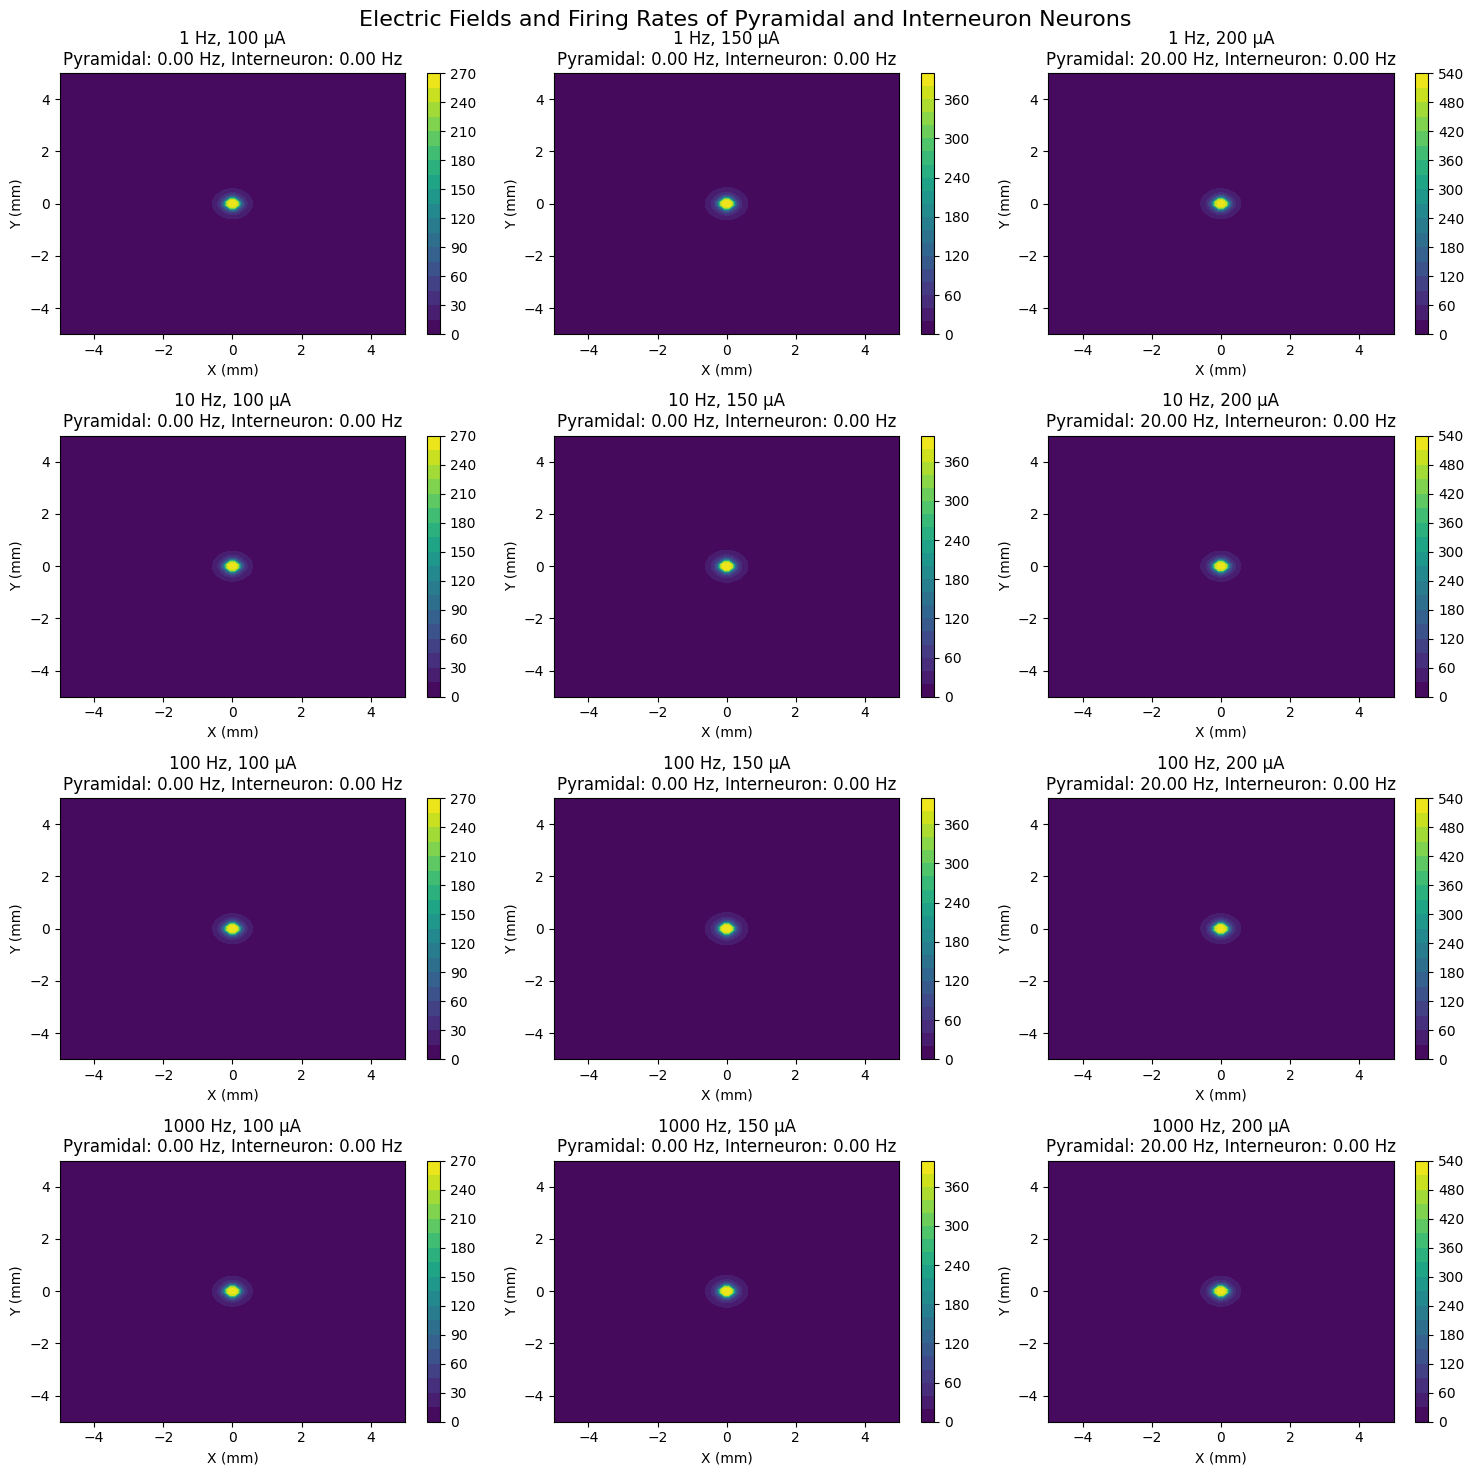

In [ ]:
# Install FEniCS
!apt-get install -y software-properties-common
!add-apt-repository -y ppa:fenics-packages/fenics
!apt-get update
!apt-get install -y fenics
!fenics-version

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley Model for Neurons
class HodgkinHuxley:
    C_m = 1.0  # membrane capacitance, in uF/cm^2
    g_Na = 120.0  # maximum conducances, in mS/cm^2
    g_K = 36.0
    g_L = 0.3
    E_Na = 50.0  # Nernst reversal potentials, in mV
    E_K = -77.0
    E_L = -54.387

    def alpha_m(self, V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    def beta_m(self, V): return 4.0 * np.exp(-(V + 65) / 18)
    def alpha_h(self, V): return 0.07 * np.exp(-(V + 65) / 20)
    def beta_h(self, V): return 1.0 / (1 + np.exp(-(V + 35) / 10))
    def alpha_n(self, V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    def beta_n(self, V): return 0.125 * np.exp(-(V + 65) / 80)

    def __call__(self, X, t, I):
        V, m, h, n = X
        dVdt = (I - self.g_Na * m**3 * h * (V - self.E_Na) - self.g_K * n**4 * (V - self.E_K) - self.g_L * (V - self.E_L)) / self.C_m
        dmdt = self.alpha_m(V) * (1 - m) - self.beta_m(V) * m
        dhdt = self.alpha_h(V) * (1 - h) - self.beta_h(V) * h
        dndt = self.alpha_n(V) * (1 - n) - self.beta_n(V) * n
        return dVdt, dmdt, dhdt, dndt

# Define parameters
frequencies = [1, 10, 100, 1000]  # Hz
intensities = [100, 150, 200]     # μA
conductivity = 0.33               # S/m (typical brain tissue conductivity)
grid_size = 100                   # Grid size for simulation (100x100)
electrode_distance = 10           # Distance between electrodes in mm

# Create a grid
x = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
y = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
X, Y = np.meshgrid(x, y)

# Function to compute electric potential
def compute_potential(intensity, frequency):
    V = intensity / (2 * np.pi * conductivity * np.sqrt(X**2 + Y**2 + 1e-9))
    return V

# Simulate firing rates
def simulate_firing_rate(model, I_ext, t_max=50):
    t = np.linspace(0, t_max, 1000)
    X0 = [-65, 0.05, 0.6, 0.32]
    sol = odeint(model, X0, t, args=(I_ext,))
    V = sol[:, 0]
    spikes = np.where((V[:-1] < 0) & (V[1:] >= 0))[0]
    firing_rate = len(spikes) / t_max * 1000  # spikes per second
    return firing_rate

# Plot the results
fig, axes = plt.subplots(len(frequencies), len(intensities), figsize=(15, 15))
fig.suptitle('Electric Fields and Firing Rates of Pyramidal and Interneuron Neurons', fontsize=16)

hh_model_pyramidal = HodgkinHuxley()
hh_model_interneuron = HodgkinHuxley()  # Assume similar model for simplicity

for i, frequency in enumerate(frequencies):
    for j, intensity in enumerate(intensities):
        V = compute_potential(intensity, frequency)
        E_x, E_y = np.gradient(-V)  # Electric field components
        E_magnitude = np.sqrt(E_x**2 + E_y**2)

        # Compute firing rates for pyramidal and interneurons
        I_ext_pyramidal = E_magnitude.mean()  # Simplified external current for simulation
        I_ext_interneuron = E_magnitude.mean() * 0.8  # Assume lower sensitivity for interneurons

        firing_rate_pyramidal = simulate_firing_rate(hh_model_pyramidal, I_ext_pyramidal)
        firing_rate_interneuron = simulate_firing_rate(hh_model_interneuron, I_ext_interneuron)

        ax = axes[i, j]
        c = ax.contourf(X, Y, E_magnitude, levels=20, cmap='viridis')
        ax.set_title(f'{frequency} Hz, {intensity} μA\nPyramidal: {firing_rate_pyramidal:.2f} Hz, Interneuron: {firing_rate_interneuron:.2f} Hz')
        fig.colorbar(c, ax=ax)
        ax.set_xlabel('X (mm)')
        ax.set_ylabel('Y (mm)')

plt.tight_layout()
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.9).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
Repository: 'deb https://ppa.launchpadcontent.net/fenics-packages/fenics/ubuntu/ jammy main'
Description:
This PPA provides packages for the FEniCS project (http://fenicsproject.org).
More info: https://launchpad.net/~fenics-packages/+archive/ubuntu/fenics
Adding repository.
Found existing deb entry in /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding deb entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding key to /etc/apt/trusted.gpg.d/fenics-packages-ubuntu-fenics.gpg with fingerprint 2C5275D7EF63D9DE2D28D3702940F521

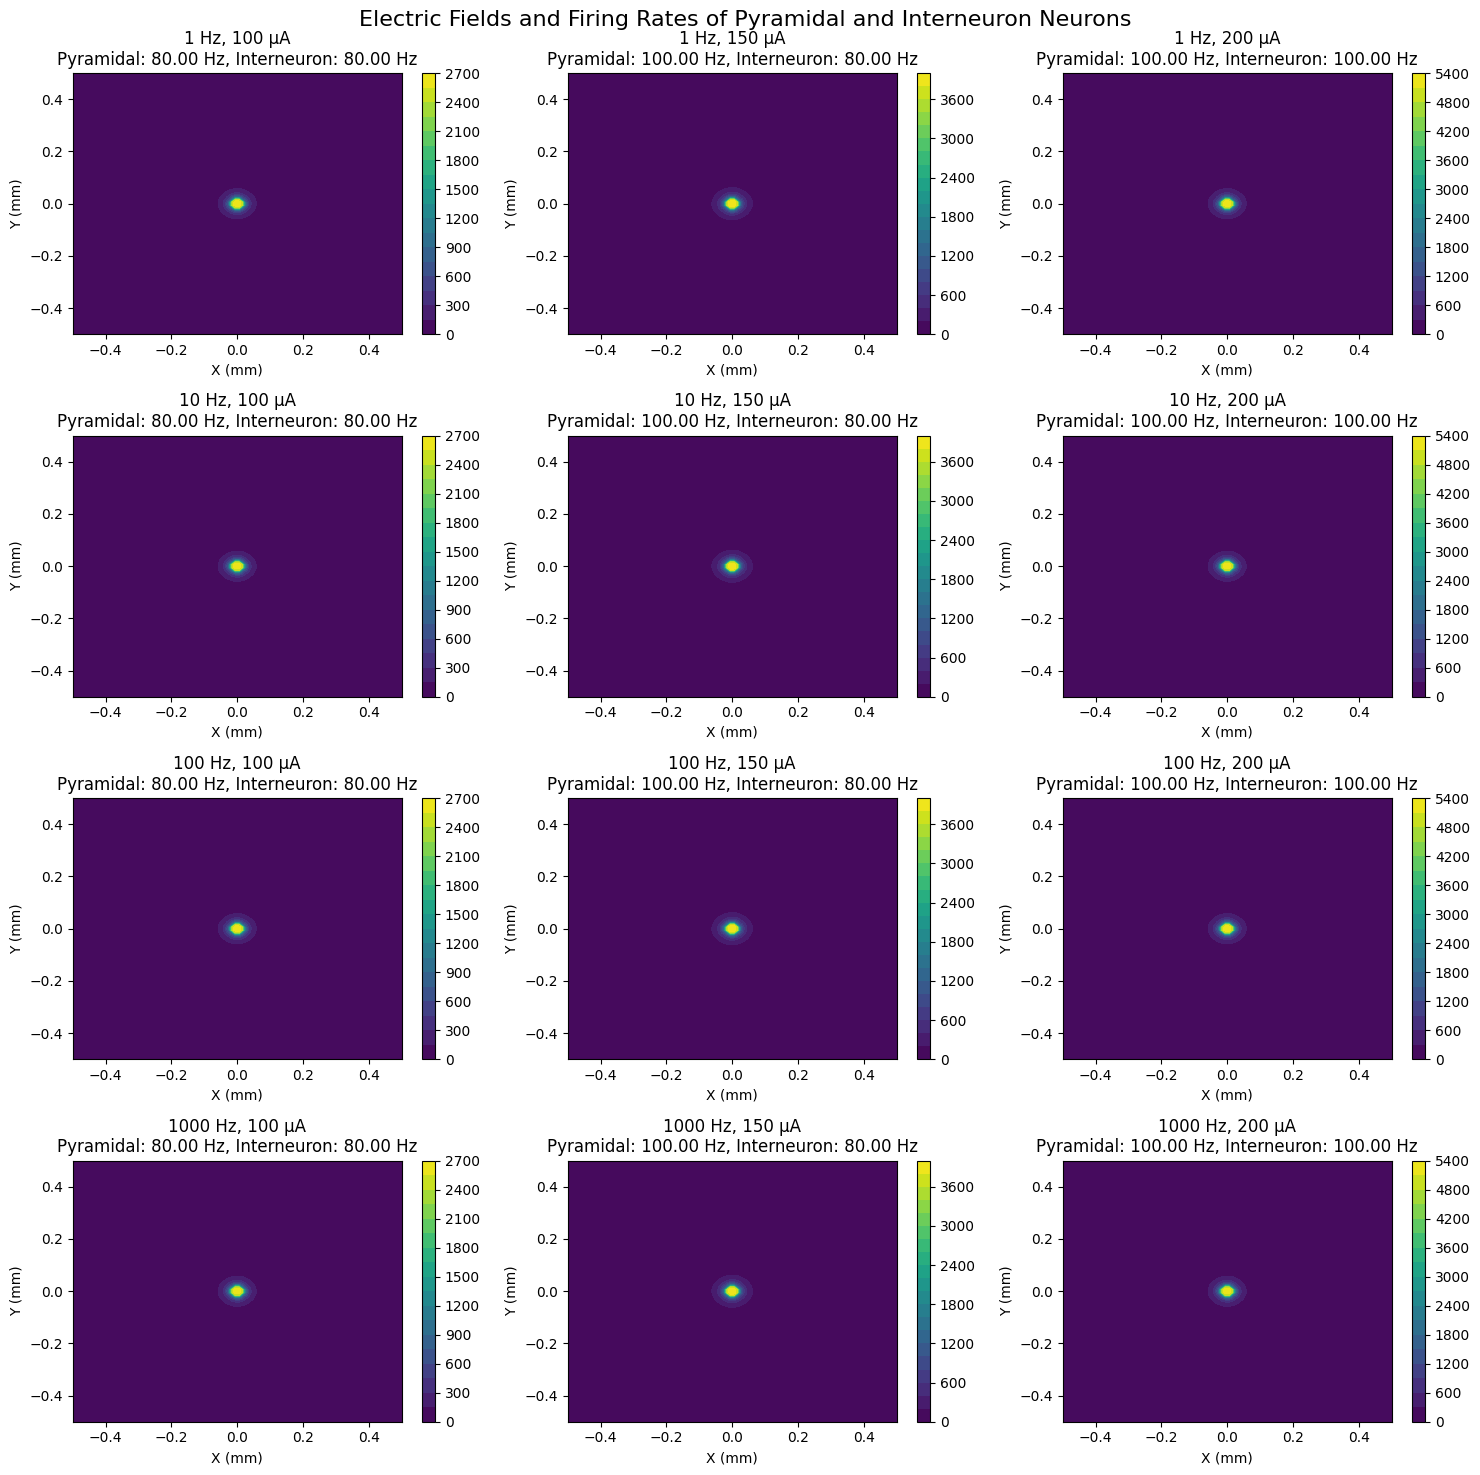

In [ ]:
# Install FEniCS
!apt-get install -y software-properties-common
!add-apt-repository -y ppa:fenics-packages/fenics
!apt-get update
!apt-get install -y fenics
!fenics-version

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley Model for Neurons
class HodgkinHuxley:
    C_m = 1.0  # membrane capacitance, in uF/cm^2
    g_Na = 120.0  # maximum conductances, in mS/cm^2
    g_K = 36.0
    g_L = 0.3
    E_Na = 50.0  # Nernst reversal potentials, in mV
    E_K = -77.0
    E_L = -54.387

    def alpha_m(self, V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    def beta_m(self, V): return 4.0 * np.exp(-(V + 65) / 18)
    def alpha_h(self, V): return 0.07 * np.exp(-(V + 65) / 20)
    def beta_h(self, V): return 1.0 / (1 + np.exp(-(V + 35) / 10))
    def alpha_n(self, V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    def beta_n(self, V): return 0.125 * np.exp(-(V + 65) / 80)

    def __call__(self, X, t, I):
        V, m, h, n = X
        dVdt = (I - self.g_Na * m**3 * h * (V - self.E_Na) - self.g_K * n**4 * (V - self.E_K) - self.g_L * (V - self.E_L)) / self.C_m
        dmdt = self.alpha_m(V) * (1 - m) - self.beta_m(V) * m
        dhdt = self.alpha_h(V) * (1 - h) - self.beta_h(V) * h
        dndt = self.alpha_n(V) * (1 - n) - self.beta_n(V) * n
        return dVdt, dmdt, dhdt, dndt

# Define parameters
frequencies = [1, 10, 100, 1000]  # Hz
intensities = [100, 150, 200]     # μA
conductivity = 0.33               # S/m (typical brain tissue conductivity)
grid_size = 100                   # Grid size for simulation (100x100)
electrode_distance = 1           # Distance between electrodes in mm

# Create a grid
x = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
y = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
X, Y = np.meshgrid(x, y)

# Function to compute electric potential
def compute_potential(intensity, frequency):
    V = intensity / (2 * np.pi * conductivity * np.sqrt(X**2 + Y**2 + 1e-9))
    return V

# Simulate firing rates
def simulate_firing_rate(model, I_ext, t_max=50):
    t = np.linspace(0, t_max, 1000)
    X0 = [-65, 0.05, 0.6, 0.32]
    sol = odeint(model, X0, t, args=(I_ext,))
    V = sol[:, 0]
    spikes = np.where((V[:-1] < 0) & (V[1:] >= 0))[0]
    firing_rate = len(spikes) / t_max * 1000  # spikes per second
    return firing_rate

# Plot the results
fig, axes = plt.subplots(len(frequencies), len(intensities), figsize=(15, 15))
fig.suptitle('Electric Fields and Firing Rates of Pyramidal and Interneuron Neurons', fontsize=16)

hh_model_pyramidal = HodgkinHuxley()
hh_model_interneuron = HodgkinHuxley()  # Assume similar model for simplicity

for i, frequency in enumerate(frequencies):
    for j, intensity in enumerate(intensities):
        V = compute_potential(intensity, frequency)
        E_x, E_y = np.gradient(-V)  # Electric field components
        E_magnitude = np.sqrt(E_x**2 + E_y**2)

        # Compute firing rates for pyramidal and interneurons
        I_ext_pyramidal = E_magnitude.mean()  # Simplified external current for simulation
        I_ext_interneuron = E_magnitude.mean() * 0.8  # Assume lower sensitivity for interneurons

        firing_rate_pyramidal = simulate_firing_rate(hh_model_pyramidal, I_ext_pyramidal)
        firing_rate_interneuron = simulate_firing_rate(hh_model_interneuron, I_ext_interneuron)

        ax = axes[i, j]
        c = ax.contourf(X, Y, E_magnitude, levels=20, cmap='viridis')
        ax.set_title(f'{frequency} Hz, {intensity} μA\nPyramidal: {firing_rate_pyramidal:.2f} Hz, Interneuron: {firing_rate_interneuron:.2f} Hz')
        fig.colorbar(c, ax=ax)
        ax.set_xlabel('X (mm)')
        ax.set_ylabel('Y (mm)')

plt.tight_layout()
plt.show()


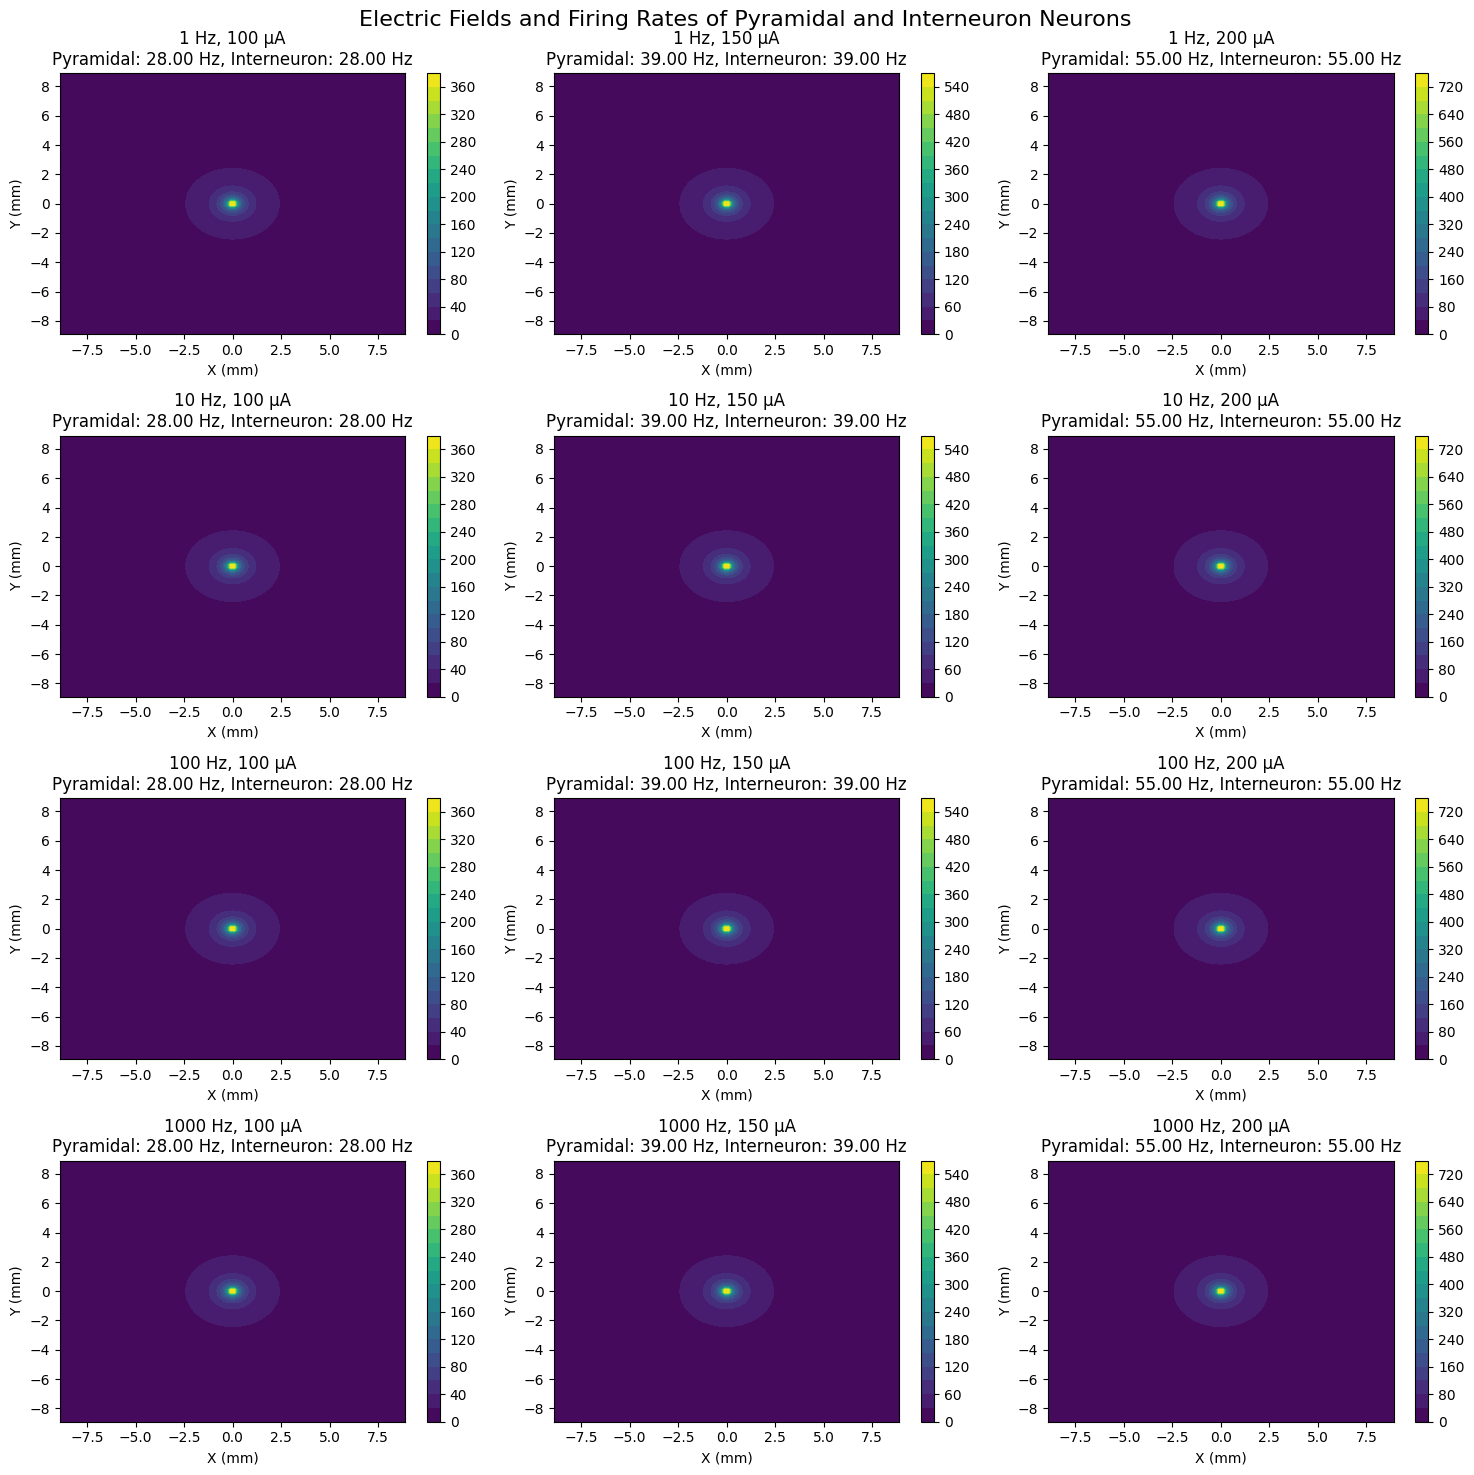

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
frequencies = [1, 10, 100, 1000]  # Hz
intensities = [100, 150, 200]     # μA
conductivity = 0.33               # S/m (typical brain tissue conductivity)
grid_size = 100                   # Grid size for simulation (100x100)
electrode_distance = 17.81        # Distance between electrodes in mm

# Hodgkin-Huxley parameters for pyramidal neurons
V_rest = -65.0  # Resting membrane potential in mV
g_Na = 120.0    # Maximum conductances in mS/cm^2
g_K = 36.0
g_L = 0.3
E_Na = 50.0     # Nernst reversal potentials in mV
E_K = -77.0
E_L = -54.387

# Hodgkin-Huxley parameters for interneurons (simplified)
V_rest_interneuron = -65.0
g_Na_interneuron = 120.0
g_K_interneuron = 36.0
g_L_interneuron = 0.3
E_Na_interneuron = 50.0
E_K_interneuron = -77.0
E_L_interneuron = -54.387

# Simulation parameters
dt = 0.01  # Time step in ms
simulation_time = 100  # Total simulation time in ms

# Create a grid
x = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
y = np.linspace(-electrode_distance/2, electrode_distance/2, grid_size)
X, Y = np.meshgrid(x, y)

# Function to compute electric potential
def compute_potential(intensity, frequency):
    V = intensity / (2 * np.pi * conductivity * np.sqrt(X**2 + Y**2 + 1e-9))
    return V

# Hodgkin-Huxley model for pyramidal neurons
def compute_firing_rate(V_ext):
    V = V_rest
    m = h = n = 0.5  # Initial values for gating variables
    firing_rate = 0
    for t in np.arange(0, simulation_time, dt):
        alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
        beta_m = 4.0 * np.exp(-(V + 65) / 18)
        alpha_h = 0.07 * np.exp(-(V + 65) / 20)
        beta_h = 1.0 / (1 + np.exp(-(V + 35) / 10))
        alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
        beta_n = 0.125 * np.exp(-(V + 65) / 80)

        m += dt * (alpha_m * (1 - m) - beta_m * m)
        h += dt * (alpha_h * (1 - h) - beta_h * h)
        n += dt * (alpha_n * (1 - n) - beta_n * n)

        I_Na = g_Na * m**3 * h * (V - E_Na)
        I_K = g_K * n**4 * (V - E_K)
        I_L = g_L * (V - E_L)

        V += dt * (-I_Na - I_K - I_L + V_ext[int(len(V_ext)/2)][int(len(V_ext)/2)])

        if V >= 0:
            firing_rate += 1
            V = V_rest  # Reset after spike

    return firing_rate

# Hodgkin-Huxley model for interneurons (simplified)
def compute_firing_rate_interneuron(V_ext):
    V = V_rest_interneuron
    m = h = n = 0.5
    firing_rate = 0
    for t in np.arange(0, simulation_time, dt):
        alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
        beta_m = 4.0 * np.exp(-(V + 65) / 18)
        alpha_h = 0.07 * np.exp(-(V + 65) / 20)
        beta_h = 1.0 / (1 + np.exp(-(V + 35) / 10))
        alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
        beta_n = 0.125 * np.exp(-(V + 65) / 80)

        m += dt * (alpha_m * (1 - m) - beta_m * m)
        h += dt * (alpha_h * (1 - h) - beta_h * h)
        n += dt * (alpha_n * (1 - n) - beta_n * n)

        I_Na = g_Na_interneuron * m**3 * h * (V - E_Na_interneuron)
        I_K = g_K_interneuron * n**4 * (V - E_K_interneuron)
        I_L = g_L_interneuron * (V - E_L_interneuron)

        V += dt * (-I_Na - I_K - I_L + V_ext[int(len(V_ext)/2)][int(len(V_ext)/2)])

        if V >= 0:
            firing_rate += 1
            V = V_rest_interneuron  # Reset after spike

    return firing_rate

# Plot the results
fig, axes = plt.subplots(len(frequencies), len(intensities), figsize=(15, 15))
fig.suptitle('Electric Fields and Firing Rates of Pyramidal and Interneuron Neurons', fontsize=16)

for i, frequency in enumerate(frequencies):
    for j, intensity in enumerate(intensities):
        V_ext = compute_potential(intensity, frequency)
        firing_rate_pyramidal = compute_firing_rate(V_ext)
        firing_rate_interneuron = compute_firing_rate_interneuron(V_ext)

        ax = axes[i, j]
        c = ax.contourf(X, Y, V_ext, levels=20, cmap='viridis')
        ax.set_title(f'{frequency} Hz, {intensity} μA\nPyramidal: {firing_rate_pyramidal:.2f} Hz, Interneuron: {firing_rate_interneuron:.2f} Hz')
        fig.colorbar(c, ax=ax)
        ax.set_xlabel('X (mm)')
        ax.set_ylabel('Y (mm)')

plt.tight_layout()
plt.show()
